Connected to venv64 (Python 3.12.3)

Initializing ENHANCED Bitcoin Bull Market Predictor...
Starting enhanced feature engineering...
Loading data...
Fear & Greed index loaded successfully
Google Trends data loaded successfully
Calculating enhanced technical indicators with sentiment...
Creating enhanced bull market target...
Bull market next week target balance: 0.359
Enhanced feature set created: (1953, 96)
Selecting robust features...
Selected 12 features including log return sentiment: ['RSI_7', 'RSI_14', 'price_vs_sma', 'price_momentum_5d', 'bb_position', 'macd_histogram', 'mvrv_zscore_proxy', 'fear_greed_index', 'fear_greed_momentum', 'fear_contrarian', 'price_sentiment_divergence', 'search_price_momentum_corr']
✅ Selected 12 features
Available columns in feature_df:
['date', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto', 'supply', 'market_cap', 'price_log_return', 'volatility_5d', 'volatility_10d', 'volatility_30d', 'volumefrom_log_return', 'market_cap_log_return', 'volatility_5d_log_return', 'volatility_

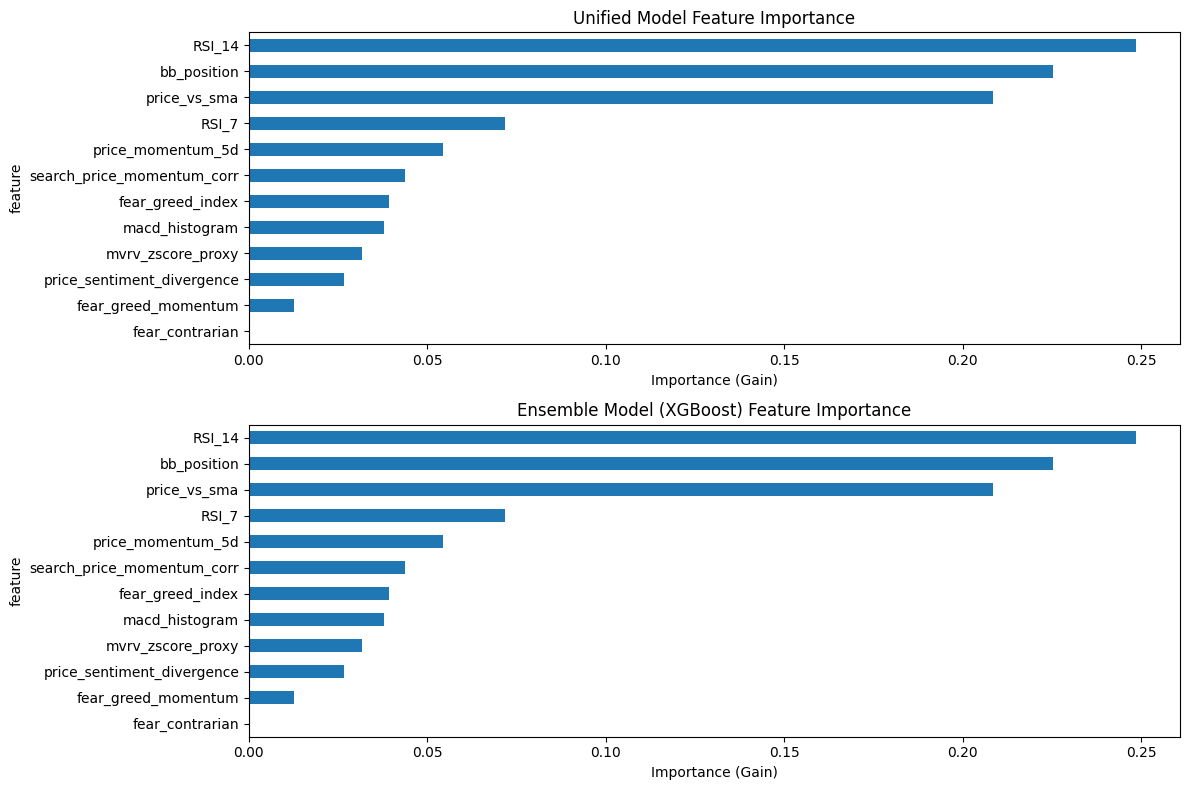


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2168
  Technical_RSI        0.1601
  Momentum             0.0544
  Sentiment_Search     0.0438
  Advanced_Technical   0.0379
  OnChain_Proxies      0.0317
  Combined_Sentiment   0.0265
  Sentiment_FearGreed  0.0173
WALK-FORWARD VALIDATION RESULTS for Unified_Rolling:
  • Unified Model:  71.0% accuracy (1650 predictions)
  • Ensemble Model: 72.7% accuracy (1650 predictions)

PERFORMANCE ASSESSMENT for Unified_Rolling:
EXCELLENT: 71.0% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Rolling:
  • Random Baseline:     50.0%
  • Majority Class:      63.8%
  • Your Model:          71.0%
  • Edge over Random:    +21.0%
  • Edge over Majority:  +7.2%

RESULTS ANALYSIS FOR Unified_Expanding
WALK-FORWARD CROSS-VALIDATION RESULTS
unified_model: 0.7345 ± 0.4416 (1650 predictions)
ensemble_model: 0.7291 ± 0.4444 (1650 predictions)

Regime Distribution:

Regime-Specific Per

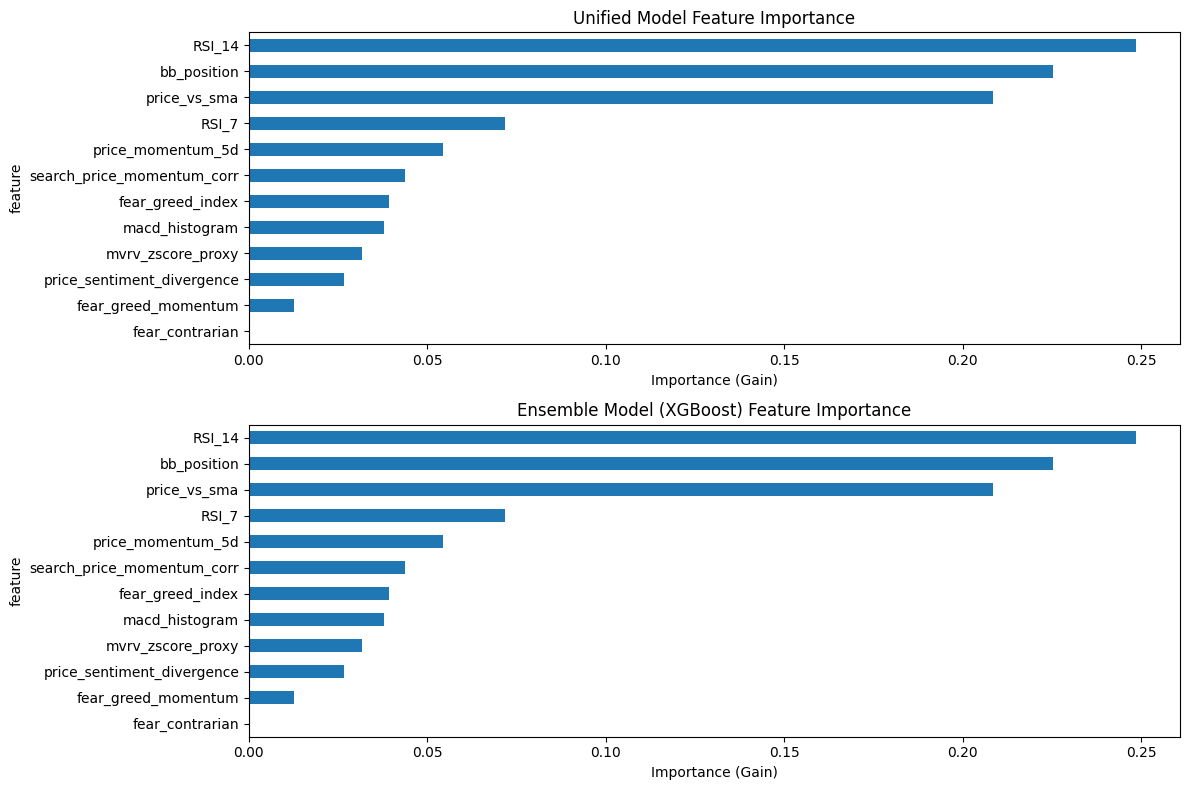


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2168
  Technical_RSI        0.1601
  Momentum             0.0544
  Sentiment_Search     0.0438
  Advanced_Technical   0.0379
  OnChain_Proxies      0.0317
  Combined_Sentiment   0.0265
  Sentiment_FearGreed  0.0173
WALK-FORWARD VALIDATION RESULTS for Unified_Expanding:
  • Unified Model:  73.5% accuracy (1650 predictions)
  • Ensemble Model: 72.9% accuracy (1650 predictions)

PERFORMANCE ASSESSMENT for Unified_Expanding:
EXCELLENT: 73.5% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Expanding:
  • Random Baseline:     50.0%
  • Majority Class:      63.8%
  • Your Model:          73.5%
  • Edge over Random:    +23.5%
  • Edge over Majority:  +9.7%

RESULTS ANALYSIS FOR Regime_Rolling
Total predictions made: 120
Correct predictions: 85
Regime-Specific Model Accuracy: 70.8%

Regime Model Usage:
  • Bear model used: 92 times (76.7%)
  • Bull model used: 28 times

In [ ]:
from nodiensenv.analyser_bull_bear import EnhancedRegimeSpecificPredictor
from nodiensenv.constants import DATA_DIR
import pandas as pd


data_paths = {
    "bitcoin": DATA_DIR / "BTC_price_mcap.csv",
    "google_trends": DATA_DIR / "BTC_trend_log_returns_2019-2025.csv",
    "fear_greed": DATA_DIR / "fear_greed_index.csv",
}

print("Initializing ENHANCED Bitcoin Bull Market Predictor...")
predictor = EnhancedRegimeSpecificPredictor(data_paths=data_paths)

# Execute enhanced pipeline
print("Starting enhanced feature engineering...")
predictor.create_features()

# Select features first
print("Selecting robust features...")
predictor.select_robust_features()

if predictor.unified_features is None:
    print("❌ Feature selection failed!")
    exit()
else:
    print(f"✅ Selected {len(predictor.unified_features)} features")


# NEW: Train regime-specific models (bull/bear prediction models)
print("Available columns in feature_df:")
print(list(predictor.feature_df.columns))
print("\nSelected unified_features:")
print(predictor.unified_features)

print("Training regime-specific models...")
predictor.train_regime_specific_models()

# Keep your original unified models as well
print("Training unified models...")
predictor.train_regime_models()  # Your original method
predictor.train_ensemble_models()

# Walk-forward validation - BOTH approaches
print("\n" + "=" * 70)
print("WALK-FORWARD CROSS-VALIDATION")
print("=" * 70)

# Configuration 1: Original unified model approach
print("Testing Original Unified Models...")
print("Rolling Window (600 days)...")
wf_results_rolling = predictor.walk_forward_validation(
    window_size=600, step_size=30, min_train_size=300
)

print("Expanding Window...")
wf_results_expanding = predictor.walk_forward_validation(
    window_size=None, step_size=30, min_train_size=300
)

# Configuration 2: NEW regime-specific approach
print("\n" + "=" * 50)
print("REGIME-SPECIFIC MODEL VALIDATION")
print("=" * 50)

print("Testing Regime-Specific Models (Rolling Window)...")
regime_results_rolling = predictor.walk_forward_validation_regime_specific(
    window_size=600, step_size=30, min_train_size=300
)

print("Testing Regime-Specific Models (Expanding Window)...")
regime_results_expanding = predictor.walk_forward_validation_regime_specific(
    window_size=None, step_size=30, min_train_size=300
)

# Organize all results
all_configurations = {
    "Unified_Rolling": wf_results_rolling,
    "Unified_Expanding": wf_results_expanding,
    "Regime_Rolling": regime_results_rolling,
    "Regime_Expanding": regime_results_expanding,
}

# Analyze each configuration
for configuration, results in all_configurations.items():
    print("\n" + "=" * 70)
    print(f"RESULTS ANALYSIS FOR {configuration}")
    print("=" * 70)

    if configuration.startswith("Regime"):
        # Handle regime-specific results
        if results.get("predictions") and len(results["predictions"]) > 0:
            total_predictions = len(results["predictions"])
            correct_predictions = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            )
            accuracy = correct_predictions / total_predictions

            print(f"Total predictions made: {total_predictions}")
            print(f"Correct predictions: {correct_predictions}")
            print(f"Regime-Specific Model Accuracy: {accuracy:.1%}")

            # Regime usage analysis
            regime_usage = pd.Series(results["regimes_used"]).value_counts()
            print(f"\nRegime Model Usage:")
            for regime, count in regime_usage.items():
                percentage = count / total_predictions * 100
                print(
                    f"  • {regime.title()} model used: {count} times ({percentage:.1f}%)"
                )

            # Model usage analysis
            model_usage = pd.Series(results["models_used"]).value_counts()
            print(f"\nModel Type Usage:")
            for model, count in model_usage.items():
                percentage = count / total_predictions * 100
                print(f"  • {model}: {count} times ({percentage:.1f}%)")

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if accuracy > 0.70:
                print(
                    f"EXCELLENT: {accuracy:.1%} accuracy is exceptional for regime prediction!"
                )
            elif accuracy > 0.60:
                print(
                    f"VERY GOOD: {accuracy:.1%} accuracy is strong for regime transitions!"
                )
            elif accuracy > 0.55:
                print(
                    f"GOOD: {accuracy:.1%} accuracy shows meaningful predictive value!"
                )
            elif accuracy > 0.52:
                print(
                    f"MODERATE: {accuracy:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {accuracy:.1%} accuracy needs significant improvement")

            # Save regime-specific results
            regime_df = pd.DataFrame(
                {
                    "prediction": results["predictions"],
                    "actual": results["actual"],
                    "regime_used": results["regimes_used"],
                    "model_used": results["models_used"],
                }
            )
            regime_df.to_csv(
                f"regime_specific_results_{configuration}.csv", index=False
            )

        else:
            print("No regime-specific predictions were generated!")

    else:
        # Handle unified model results (your original code)
        if results.get("unified_model") and len(results["unified_model"]) > 0:
            # Your existing analysis code
            results_df = predictor.analyze_walk_forward_results(results)
            results_df.to_csv(
                f"enhanced_walk_forward_results_{configuration}.csv", index=False
            )

            importance_df = predictor.get_feature_importance_analysis()
            importance_df.to_csv(
                f"feature_importance_detailed_{configuration}.csv", index=False
            )

            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            ensemble_acc = sum(results["ensemble_model"]) / len(
                results["ensemble_model"]
            )

            print(f"WALK-FORWARD VALIDATION RESULTS for {configuration}:")
            print(
                f"  • Unified Model:  {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
            print(
                f"  • Ensemble Model: {ensemble_acc:.1%} accuracy ({len(results['ensemble_model'])} predictions)"
            )

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if unified_acc > 0.70:
                print(
                    f"EXCELLENT: {unified_acc:.1%} accuracy is exceptional for financial prediction!"
                )
            elif unified_acc > 0.60:
                print(
                    f"VERY GOOD: {unified_acc:.1%} accuracy is strong for Bitcoin prediction!"
                )
            elif unified_acc > 0.55:
                print(
                    f"GOOD: {unified_acc:.1%} accuracy shows meaningful predictive value!"
                )
            elif unified_acc > 0.52:
                print(
                    f"MODERATE: {unified_acc:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {unified_acc:.1%} accuracy needs significant improvement")

            # Baseline comparisons
            target_balance = predictor.feature_df["target"].mean()
            majority_baseline = max(target_balance, 1 - target_balance)

            print(f"\nBASELINE COMPARISONS for {configuration}:")
            print(f"  • Random Baseline:     50.0%")
            print(f"  • Majority Class:      {majority_baseline:.1%}")
            print(f"  • Your Model:          {unified_acc:.1%}")
            print(f"  • Edge over Random:    +{(unified_acc - 0.5)*100:.1f}%")
            print(
                f"  • Edge over Majority:  {(unified_acc - majority_baseline)*100:+.1f}%"
            )

        else:
            print("No unified model predictions were generated!")

# FINAL COMPREHENSIVE COMPARISON
print("\n" + "=" * 70)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 70)

print("\nModel Performance Summary:")
print("-" * 50)

for config_name, results in all_configurations.items():
    if config_name.startswith("Regime"):
        if results.get("predictions"):
            accuracy = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            ) / len(results["predictions"])
            print(
                f"{config_name:20s}: {accuracy:.1%} accuracy ({len(results['predictions'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")
    else:
        if results.get("unified_model"):
            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            print(
                f"{config_name:20s}: {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")


print("\n" + "=" * 70)
print("ANALYZING REGIME MODEL FEATURE IMPORTANCE")
print("=" * 70)

# Analyze feature importance for bull/bear models
regime_feature_importance = predictor.analyze_regime_model_feature_importance()


print(f"\n ENHANCED REGIME-SPECIFIC BITCOIN PREDICTION ANALYSIS COMPLETE!")

Restarted venv64 (Python 3.12.3)

Initializing ENHANCED Bitcoin Bull Market Predictor...
Starting enhanced feature engineering...
Loading data...
Fear & Greed index loaded successfully
Google Trends data loaded successfully
Calculating enhanced technical indicators with sentiment...
Creating enhanced bull market target...
Bull market next week target balance: 0.359
Enhanced feature set created: (1953, 96)
Selecting robust features...
Selected 12 features including log return sentiment: ['RSI_7', 'RSI_14', 'price_vs_sma', 'price_momentum_5d', 'bb_position', 'macd_histogram', 'mvrv_zscore_proxy', 'fear_greed_index', 'fear_greed_momentum', 'fear_contrarian', 'price_sentiment_divergence', 'search_price_momentum_corr']
✅ Selected 12 features
Available columns in feature_df:
['date', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto', 'supply', 'market_cap', 'price_log_return', 'volatility_5d', 'volatility_10d', 'volatility_30d', 'volumefrom_log_return', 'market_cap_log_return', 'volatility_5d_log_return', 'volatility_

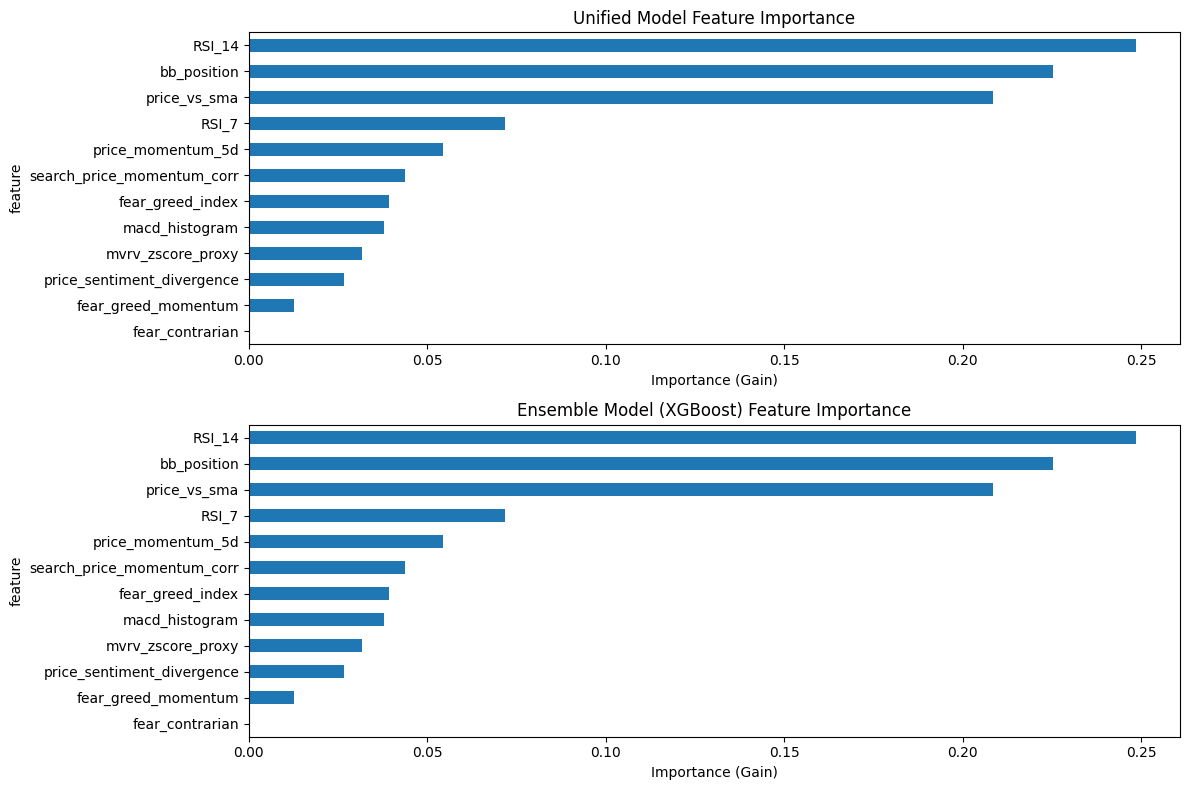


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2168
  Technical_RSI        0.1601
  Momentum             0.0544
  Sentiment_Search     0.0438
  Advanced_Technical   0.0379
  OnChain_Proxies      0.0317
  Combined_Sentiment   0.0265
  Sentiment_FearGreed  0.0173
WALK-FORWARD VALIDATION RESULTS for Unified_Rolling:
  • Unified Model:  71.0% accuracy (1650 predictions)
  • Ensemble Model: 72.7% accuracy (1650 predictions)

PERFORMANCE ASSESSMENT for Unified_Rolling:
EXCELLENT: 71.0% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Rolling:
  • Random Baseline:     50.0%
  • Majority Class:      63.8%
  • Your Model:          71.0%
  • Edge over Random:    +21.0%
  • Edge over Majority:  +7.2%

RESULTS ANALYSIS FOR Unified_Expanding
WALK-FORWARD CROSS-VALIDATION RESULTS
unified_model: 0.7345 ± 0.4416 (1650 predictions)
ensemble_model: 0.7291 ± 0.4444 (1650 predictions)

Regime Distribution:

Regime-Specific Per

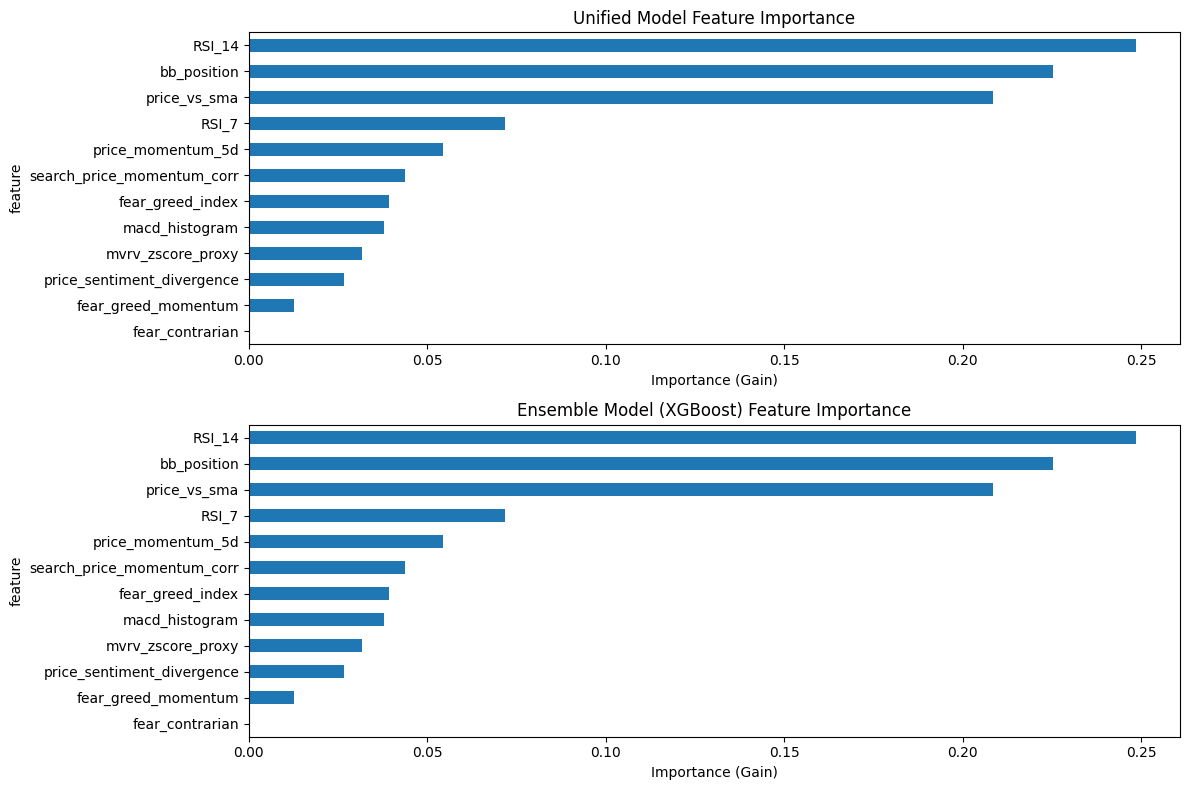


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2168
  Technical_RSI        0.1601
  Momentum             0.0544
  Sentiment_Search     0.0438
  Advanced_Technical   0.0379
  OnChain_Proxies      0.0317
  Combined_Sentiment   0.0265
  Sentiment_FearGreed  0.0173
WALK-FORWARD VALIDATION RESULTS for Unified_Expanding:
  • Unified Model:  73.5% accuracy (1650 predictions)
  • Ensemble Model: 72.9% accuracy (1650 predictions)

PERFORMANCE ASSESSMENT for Unified_Expanding:
EXCELLENT: 73.5% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Expanding:
  • Random Baseline:     50.0%
  • Majority Class:      63.8%
  • Your Model:          73.5%
  • Edge over Random:    +23.5%
  • Edge over Majority:  +9.7%

RESULTS ANALYSIS FOR Regime_Rolling
Total predictions made: 120
Correct predictions: 85
Regime-Specific Model Accuracy: 70.8%

Regime Model Usage:
  • Bear model used: 92 times (76.7%)
  • Bull model used: 28 times

In [ ]:
from nodiensenv.analyser_bull_bear import EnhancedRegimeSpecificPredictor
from nodiensenv.constants import DATA_DIR
import pandas as pd


data_paths = {
    "bitcoin": DATA_DIR / "BTC_price_mcap.csv",
    "google_trends": DATA_DIR / "BTC_trend_log_returns_2019-2025.csv",
    "fear_greed": DATA_DIR / "fear_greed_index.csv",
}

print("Initializing ENHANCED Bitcoin Bull Market Predictor...")
predictor = EnhancedRegimeSpecificPredictor(data_paths=data_paths)

# Execute enhanced pipeline
print("Starting enhanced feature engineering...")
predictor.create_features()

# Select features first
print("Selecting robust features...")
predictor.select_robust_features()

if predictor.unified_features is None:
    print("❌ Feature selection failed!")
    exit()
else:
    print(f"✅ Selected {len(predictor.unified_features)} features")


# NEW: Train regime-specific models (bull/bear prediction models)
print("Available columns in feature_df:")
print(list(predictor.feature_df.columns))
print("\nSelected unified_features:")
print(predictor.unified_features)

print("Training regime-specific models...")
predictor.train_regime_specific_models()

# Keep your original unified models as well
print("Training unified models...")
predictor.train_regime_models()  # Your original method
predictor.train_ensemble_models()

# Walk-forward validation - BOTH approaches
print("\n" + "=" * 70)
print("WALK-FORWARD CROSS-VALIDATION")
print("=" * 70)

# Configuration 1: Original unified model approach
print("Testing Original Unified Models...")
print("Rolling Window (600 days)...")
wf_results_rolling = predictor.walk_forward_validation(
    window_size=600, step_size=30, min_train_size=300
)

print("Expanding Window...")
wf_results_expanding = predictor.walk_forward_validation(
    window_size=None, step_size=30, min_train_size=300
)

# Configuration 2: NEW regime-specific approach
print("\n" + "=" * 50)
print("REGIME-SPECIFIC MODEL VALIDATION")
print("=" * 50)

print("Testing Regime-Specific Models (Rolling Window)...")
regime_results_rolling = predictor.walk_forward_validation_regime_specific(
    window_size=600, step_size=30, min_train_size=300
)

print("Testing Regime-Specific Models (Expanding Window)...")
regime_results_expanding = predictor.walk_forward_validation_regime_specific(
    window_size=None, step_size=30, min_train_size=300
)

# Organize all results
all_configurations = {
    "Unified_Rolling": wf_results_rolling,
    "Unified_Expanding": wf_results_expanding,
    "Regime_Rolling": regime_results_rolling,
    "Regime_Expanding": regime_results_expanding,
}

# Analyze each configuration
for configuration, results in all_configurations.items():
    print("\n" + "=" * 70)
    print(f"RESULTS ANALYSIS FOR {configuration}")
    print("=" * 70)

    if configuration.startswith("Regime"):
        # Handle regime-specific results
        if results.get("predictions") and len(results["predictions"]) > 0:
            total_predictions = len(results["predictions"])
            correct_predictions = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            )
            accuracy = correct_predictions / total_predictions

            print(f"Total predictions made: {total_predictions}")
            print(f"Correct predictions: {correct_predictions}")
            print(f"Regime-Specific Model Accuracy: {accuracy:.1%}")

            # Regime usage analysis
            regime_usage = pd.Series(results["regimes_used"]).value_counts()
            print(f"\nRegime Model Usage:")
            for regime, count in regime_usage.items():
                percentage = count / total_predictions * 100
                print(
                    f"  • {regime.title()} model used: {count} times ({percentage:.1f}%)"
                )

            # Model usage analysis
            model_usage = pd.Series(results["models_used"]).value_counts()
            print(f"\nModel Type Usage:")
            for model, count in model_usage.items():
                percentage = count / total_predictions * 100
                print(f"  • {model}: {count} times ({percentage:.1f}%)")

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if accuracy > 0.70:
                print(
                    f"EXCELLENT: {accuracy:.1%} accuracy is exceptional for regime prediction!"
                )
            elif accuracy > 0.60:
                print(
                    f"VERY GOOD: {accuracy:.1%} accuracy is strong for regime transitions!"
                )
            elif accuracy > 0.55:
                print(
                    f"GOOD: {accuracy:.1%} accuracy shows meaningful predictive value!"
                )
            elif accuracy > 0.52:
                print(
                    f"MODERATE: {accuracy:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {accuracy:.1%} accuracy needs significant improvement")

            # Save regime-specific results
            regime_df = pd.DataFrame(
                {
                    "prediction": results["predictions"],
                    "actual": results["actual"],
                    "regime_used": results["regimes_used"],
                    "model_used": results["models_used"],
                }
            )
            regime_df.to_csv(
                f"regime_specific_results_{configuration}.csv", index=False
            )

        else:
            print("No regime-specific predictions were generated!")

    else:
        # Handle unified model results (your original code)
        if results.get("unified_model") and len(results["unified_model"]) > 0:
            # Your existing analysis code
            results_df = predictor.analyze_walk_forward_results(results)
            results_df.to_csv(
                f"enhanced_walk_forward_results_{configuration}.csv", index=False
            )

            importance_df = predictor.get_feature_importance_analysis()
            importance_df.to_csv(
                f"feature_importance_detailed_{configuration}.csv", index=False
            )

            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            ensemble_acc = sum(results["ensemble_model"]) / len(
                results["ensemble_model"]
            )

            print(f"WALK-FORWARD VALIDATION RESULTS for {configuration}:")
            print(
                f"  • Unified Model:  {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
            print(
                f"  • Ensemble Model: {ensemble_acc:.1%} accuracy ({len(results['ensemble_model'])} predictions)"
            )

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if unified_acc > 0.70:
                print(
                    f"EXCELLENT: {unified_acc:.1%} accuracy is exceptional for financial prediction!"
                )
            elif unified_acc > 0.60:
                print(
                    f"VERY GOOD: {unified_acc:.1%} accuracy is strong for Bitcoin prediction!"
                )
            elif unified_acc > 0.55:
                print(
                    f"GOOD: {unified_acc:.1%} accuracy shows meaningful predictive value!"
                )
            elif unified_acc > 0.52:
                print(
                    f"MODERATE: {unified_acc:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {unified_acc:.1%} accuracy needs significant improvement")

            # Baseline comparisons
            target_balance = predictor.feature_df["target"].mean()
            majority_baseline = max(target_balance, 1 - target_balance)

            print(f"\nBASELINE COMPARISONS for {configuration}:")
            print(f"  • Random Baseline:     50.0%")
            print(f"  • Majority Class:      {majority_baseline:.1%}")
            print(f"  • Your Model:          {unified_acc:.1%}")
            print(f"  • Edge over Random:    +{(unified_acc - 0.5)*100:.1f}%")
            print(
                f"  • Edge over Majority:  {(unified_acc - majority_baseline)*100:+.1f}%"
            )

        else:
            print("No unified model predictions were generated!")

# FINAL COMPREHENSIVE COMPARISON
print("\n" + "=" * 70)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 70)

print("\nModel Performance Summary:")
print("-" * 50)

for config_name, results in all_configurations.items():
    if config_name.startswith("Regime"):
        if results.get("predictions"):
            accuracy = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            ) / len(results["predictions"])
            print(
                f"{config_name:20s}: {accuracy:.1%} accuracy ({len(results['predictions'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")
    else:
        if results.get("unified_model"):
            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            print(
                f"{config_name:20s}: {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")


print("\n" + "=" * 70)
print("ANALYZING REGIME MODEL FEATURE IMPORTANCE")
print("=" * 70)

# Analyze feature importance for bull/bear models
regime_feature_importance = predictor.analyze_regime_model_feature_importance()


print(f"\n ENHANCED REGIME-SPECIFIC BITCOIN PREDICTION ANALYSIS COMPLETE!")

Restarted venv64 (Python 3.12.3)

Initializing ENHANCED Bitcoin Bull Market Predictor...
Starting enhanced feature engineering...
Loading data...
Fear & Greed index loaded successfully
Google Trends data loaded successfully
Calculating enhanced technical indicators with sentiment...
Creating enhanced bull market target...
Bull market next week target balance: 0.359
Enhanced feature set created: (1953, 96)
Selecting robust features...
Selected 12 features including log return sentiment: ['RSI_7', 'RSI_14', 'price_vs_sma', 'price_momentum_5d', 'bb_position', 'macd_histogram', 'mvrv_zscore_proxy', 'fear_greed_index', 'fear_greed_momentum', 'fear_contrarian', 'price_sentiment_divergence', 'search_price_momentum_corr']
✅ Selected 12 features
Available columns in feature_df:
['date', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto', 'supply', 'market_cap', 'price_log_return', 'volatility_5d', 'volatility_10d', 'volatility_30d', 'volumefrom_log_return', 'market_cap_log_return', 'volatility_5d_log_return', 'volatility_

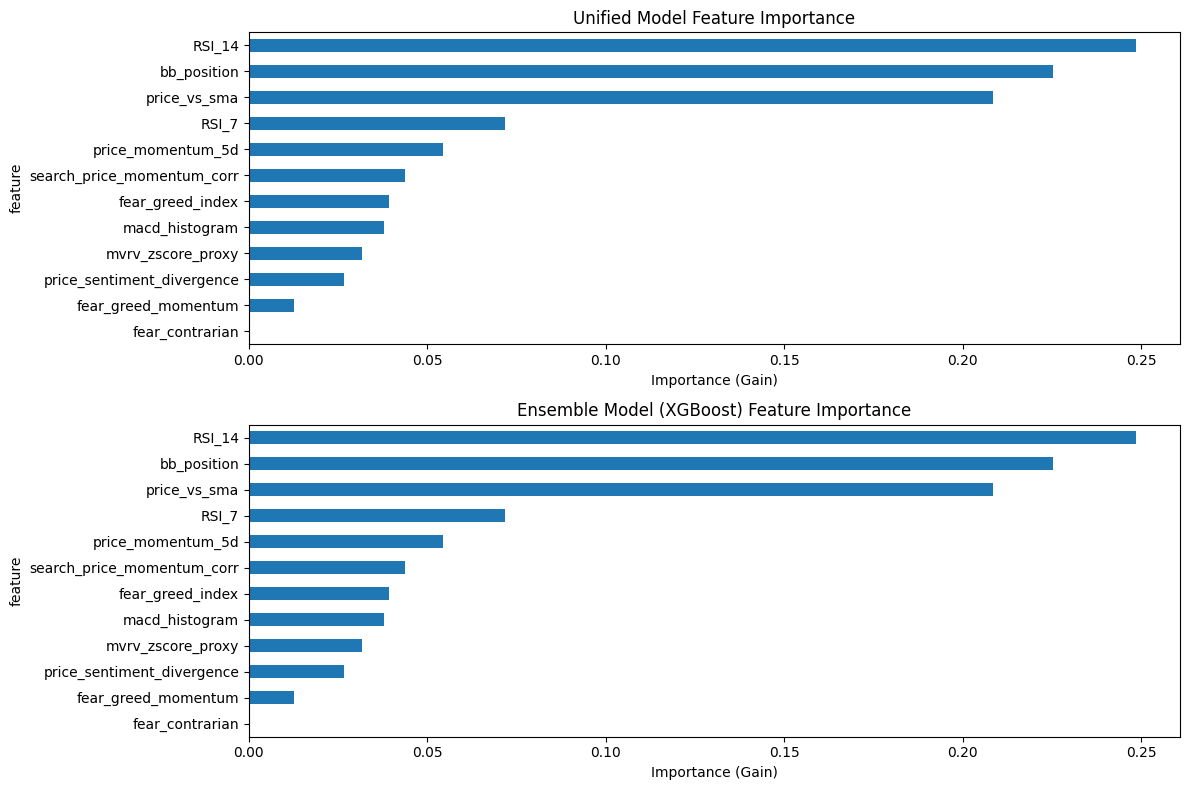


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2168
  Technical_RSI        0.1601
  Momentum             0.0544
  Sentiment_Search     0.0438
  Advanced_Technical   0.0379
  OnChain_Proxies      0.0317
  Combined_Sentiment   0.0265
  Sentiment_FearGreed  0.0173
WALK-FORWARD VALIDATION RESULTS for Unified_Rolling:
  • Unified Model:  71.0% accuracy (1650 predictions)
  • Ensemble Model: 72.7% accuracy (1650 predictions)

PERFORMANCE ASSESSMENT for Unified_Rolling:
EXCELLENT: 71.0% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Rolling:
  • Random Baseline:     50.0%
  • Majority Class:      63.8%
  • Your Model:          71.0%
  • Edge over Random:    +21.0%
  • Edge over Majority:  +7.2%

RESULTS ANALYSIS FOR Unified_Expanding
WALK-FORWARD CROSS-VALIDATION RESULTS
unified_model: 0.7345 ± 0.4416 (1650 predictions)
ensemble_model: 0.7291 ± 0.4444 (1650 predictions)

Regime Distribution:

Regime-Specific Per

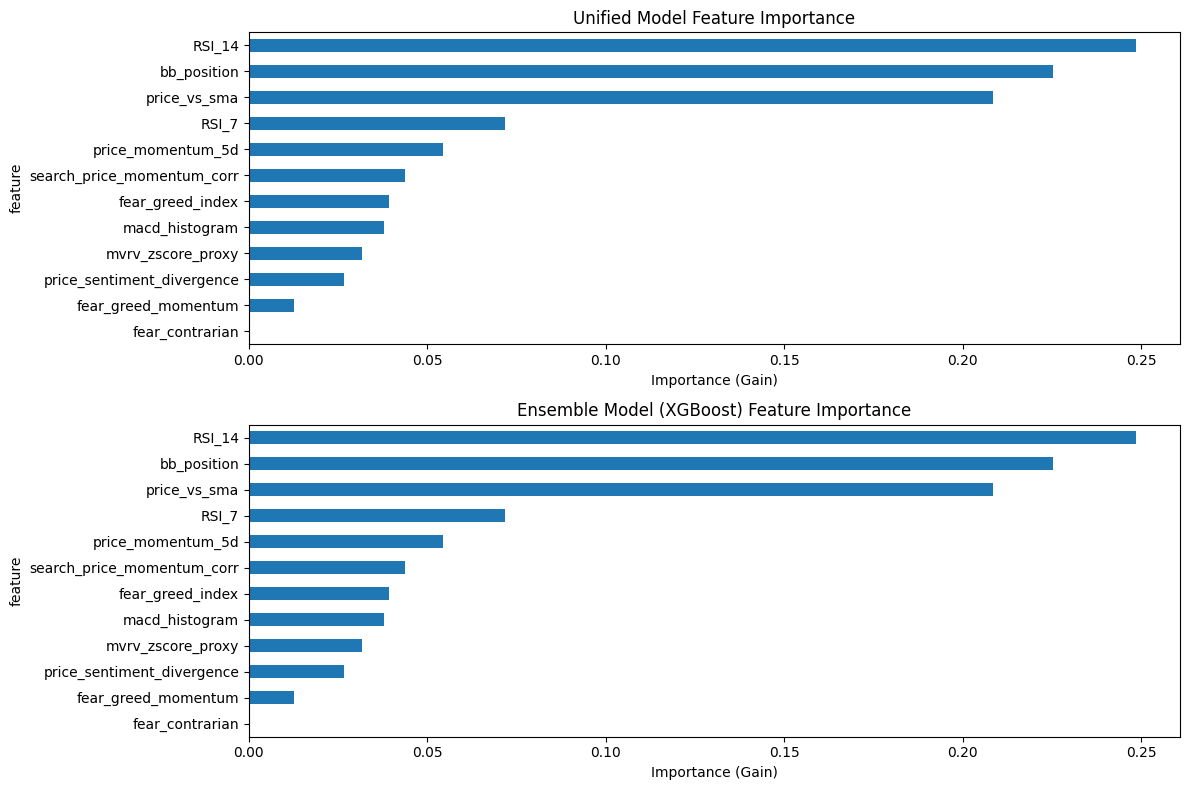


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2168
  Technical_RSI        0.1601
  Momentum             0.0544
  Sentiment_Search     0.0438
  Advanced_Technical   0.0379
  OnChain_Proxies      0.0317
  Combined_Sentiment   0.0265
  Sentiment_FearGreed  0.0173
WALK-FORWARD VALIDATION RESULTS for Unified_Expanding:
  • Unified Model:  73.5% accuracy (1650 predictions)
  • Ensemble Model: 72.9% accuracy (1650 predictions)

PERFORMANCE ASSESSMENT for Unified_Expanding:
EXCELLENT: 73.5% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Expanding:
  • Random Baseline:     50.0%
  • Majority Class:      63.8%
  • Your Model:          73.5%
  • Edge over Random:    +23.5%
  • Edge over Majority:  +9.7%

RESULTS ANALYSIS FOR Regime_Rolling
Total predictions made: 120
Correct predictions: 98
Regime-Specific Model Accuracy: 81.7%

Regime Model Usage:
  • Bear model used: 92 times (76.7%)
  • Bull model used: 28 times

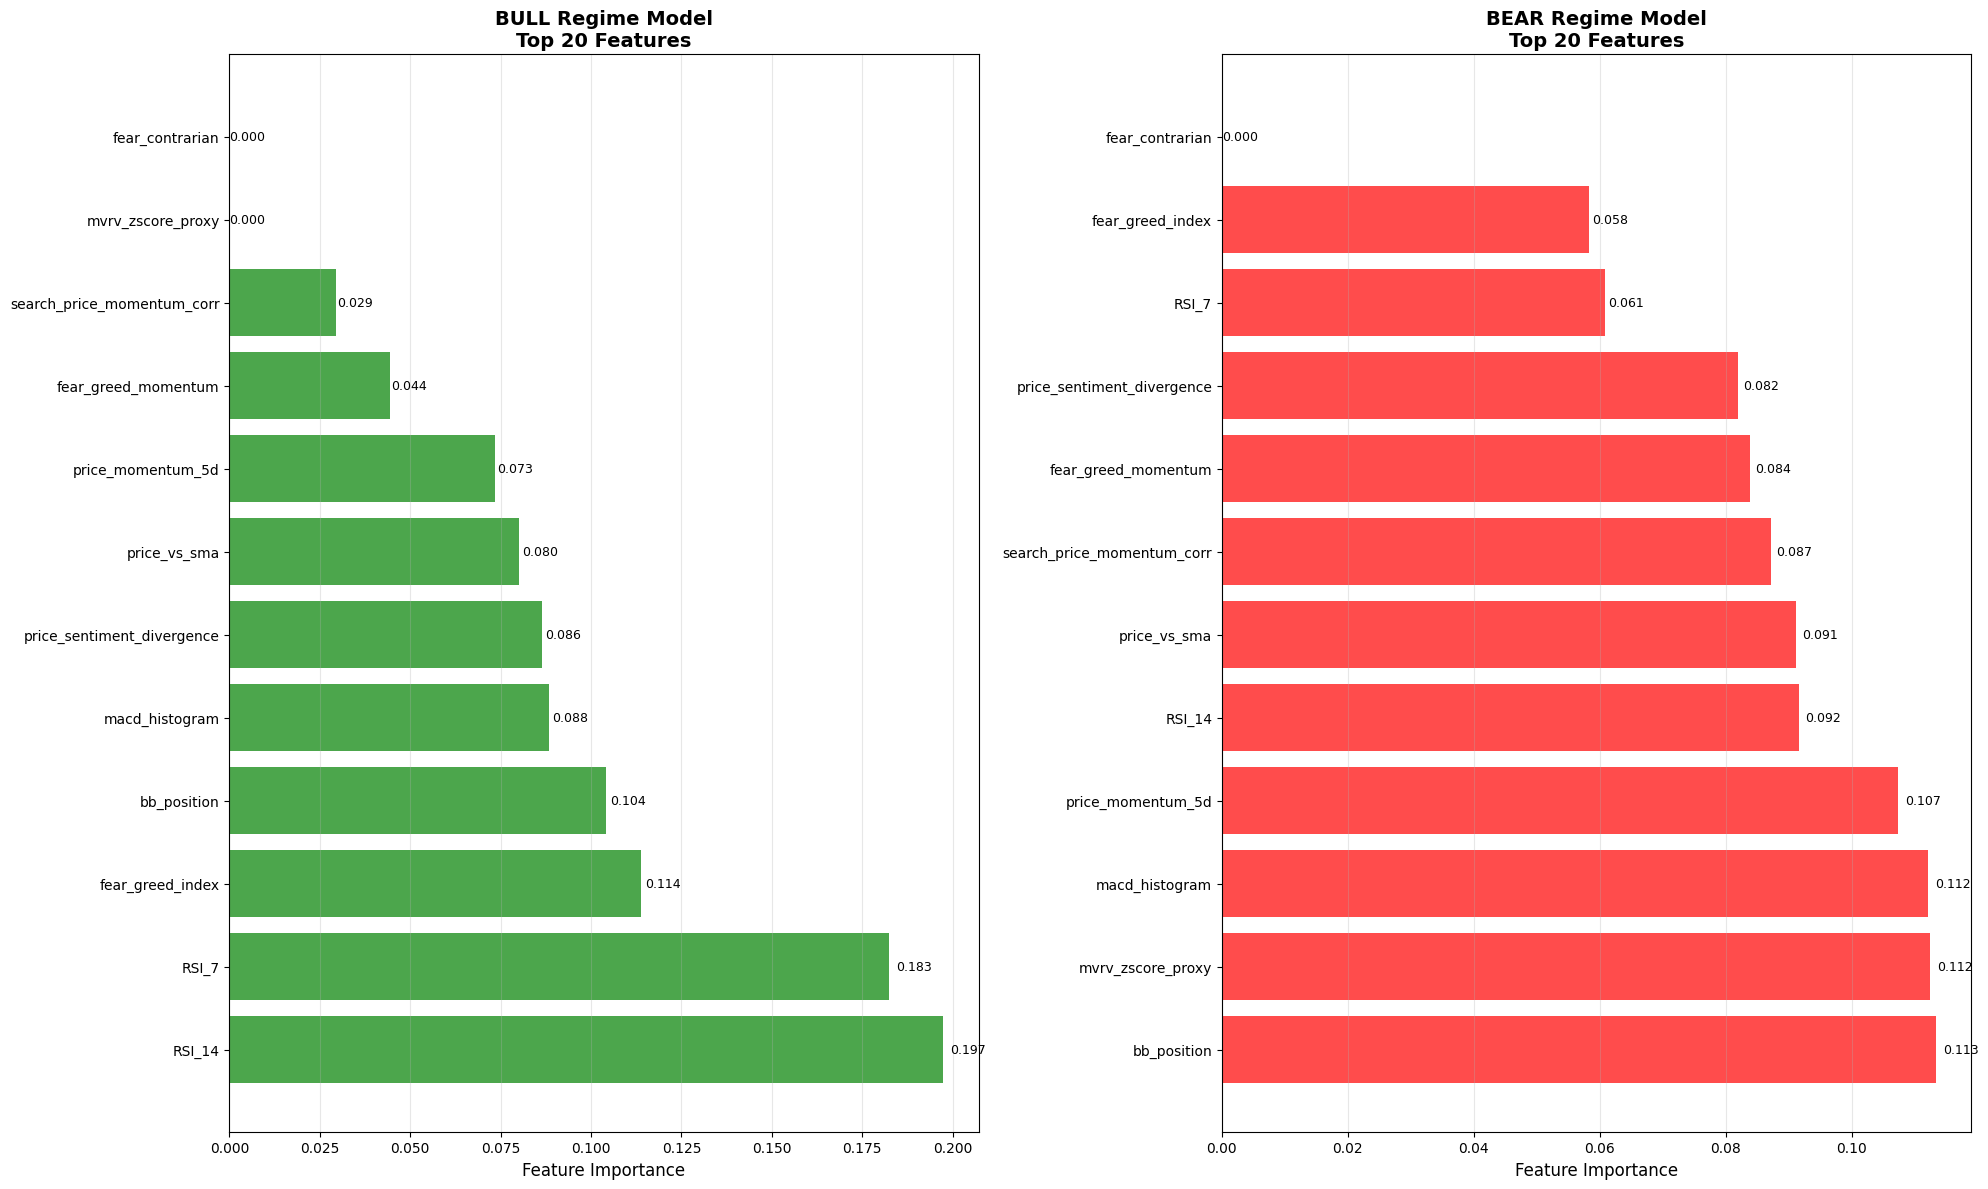

📊 Saved: regime_model_feature_comparison.png

📁 Saved: regime_model_feature_importance.csv

 ENHANCED REGIME-SPECIFIC BITCOIN PREDICTION ANALYSIS COMPLETE!


In [ ]:
from nodiensenv.analyser_bull_bear import EnhancedRegimeSpecificPredictor
from nodiensenv.constants import DATA_DIR
import pandas as pd


data_paths = {
    "bitcoin": DATA_DIR / "BTC_price_mcap.csv",
    "google_trends": DATA_DIR / "BTC_trend_log_returns_2019-2025.csv",
    "fear_greed": DATA_DIR / "fear_greed_index.csv",
}

print("Initializing ENHANCED Bitcoin Bull Market Predictor...")
predictor = EnhancedRegimeSpecificPredictor(data_paths=data_paths)

# Execute enhanced pipeline
print("Starting enhanced feature engineering...")
predictor.create_features()

# Select features first
print("Selecting robust features...")
predictor.select_robust_features()

if predictor.unified_features is None:
    print("❌ Feature selection failed!")
    exit()
else:
    print(f"✅ Selected {len(predictor.unified_features)} features")


# NEW: Train regime-specific models (bull/bear prediction models)
print("Available columns in feature_df:")
print(list(predictor.feature_df.columns))
print("\nSelected unified_features:")
print(predictor.unified_features)

print("Training regime-specific models...")
predictor.train_regime_specific_models()

# Keep your original unified models as well
print("Training unified models...")
predictor.train_regime_models()  # Your original method
predictor.train_ensemble_models()

# Walk-forward validation - BOTH approaches
print("\n" + "=" * 70)
print("WALK-FORWARD CROSS-VALIDATION")
print("=" * 70)

# Configuration 1: Original unified model approach
print("Testing Original Unified Models...")
print("Rolling Window (600 days)...")
wf_results_rolling = predictor.walk_forward_validation(
    window_size=600, step_size=30, min_train_size=300
)

print("Expanding Window...")
wf_results_expanding = predictor.walk_forward_validation(
    window_size=None, step_size=30, min_train_size=300
)

# Configuration 2: NEW regime-specific approach
print("\n" + "=" * 50)
print("REGIME-SPECIFIC MODEL VALIDATION")
print("=" * 50)

print("Testing Regime-Specific Models (Rolling Window)...")
regime_results_rolling = predictor.walk_forward_validation_regime_specific(
    window_size=600, step_size=30, min_train_size=300
)

print("Testing Regime-Specific Models (Expanding Window)...")
regime_results_expanding = predictor.walk_forward_validation_regime_specific(
    window_size=None, step_size=30, min_train_size=300
)

# Organize all results
all_configurations = {
    "Unified_Rolling": wf_results_rolling,
    "Unified_Expanding": wf_results_expanding,
    "Regime_Rolling": regime_results_rolling,
    "Regime_Expanding": regime_results_expanding,
}

# Analyze each configuration
for configuration, results in all_configurations.items():
    print("\n" + "=" * 70)
    print(f"RESULTS ANALYSIS FOR {configuration}")
    print("=" * 70)

    if configuration.startswith("Regime"):
        # Handle regime-specific results
        if results.get("predictions") and len(results["predictions"]) > 0:
            total_predictions = len(results["predictions"])
            correct_predictions = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            )
            accuracy = correct_predictions / total_predictions

            print(f"Total predictions made: {total_predictions}")
            print(f"Correct predictions: {correct_predictions}")
            print(f"Regime-Specific Model Accuracy: {accuracy:.1%}")

            # Regime usage analysis
            regime_usage = pd.Series(results["regimes_used"]).value_counts()
            print(f"\nRegime Model Usage:")
            for regime, count in regime_usage.items():
                percentage = count / total_predictions * 100
                print(
                    f"  • {regime.title()} model used: {count} times ({percentage:.1f}%)"
                )

            # Model usage analysis
            model_usage = pd.Series(results["models_used"]).value_counts()
            print(f"\nModel Type Usage:")
            for model, count in model_usage.items():
                percentage = count / total_predictions * 100
                print(f"  • {model}: {count} times ({percentage:.1f}%)")

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if accuracy > 0.70:
                print(
                    f"EXCELLENT: {accuracy:.1%} accuracy is exceptional for regime prediction!"
                )
            elif accuracy > 0.60:
                print(
                    f"VERY GOOD: {accuracy:.1%} accuracy is strong for regime transitions!"
                )
            elif accuracy > 0.55:
                print(
                    f"GOOD: {accuracy:.1%} accuracy shows meaningful predictive value!"
                )
            elif accuracy > 0.52:
                print(
                    f"MODERATE: {accuracy:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {accuracy:.1%} accuracy needs significant improvement")

            # Save regime-specific results
            regime_df = pd.DataFrame(
                {
                    "prediction": results["predictions"],
                    "actual": results["actual"],
                    "regime_used": results["regimes_used"],
                    "model_used": results["models_used"],
                }
            )
            regime_df.to_csv(
                f"regime_specific_results_{configuration}.csv", index=False
            )

        else:
            print("No regime-specific predictions were generated!")

    else:
        # Handle unified model results (your original code)
        if results.get("unified_model") and len(results["unified_model"]) > 0:
            # Your existing analysis code
            results_df = predictor.analyze_walk_forward_results(results)
            results_df.to_csv(
                f"enhanced_walk_forward_results_{configuration}.csv", index=False
            )

            importance_df = predictor.get_feature_importance_analysis()
            importance_df.to_csv(
                f"feature_importance_detailed_{configuration}.csv", index=False
            )

            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            ensemble_acc = sum(results["ensemble_model"]) / len(
                results["ensemble_model"]
            )

            print(f"WALK-FORWARD VALIDATION RESULTS for {configuration}:")
            print(
                f"  • Unified Model:  {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
            print(
                f"  • Ensemble Model: {ensemble_acc:.1%} accuracy ({len(results['ensemble_model'])} predictions)"
            )

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if unified_acc > 0.70:
                print(
                    f"EXCELLENT: {unified_acc:.1%} accuracy is exceptional for financial prediction!"
                )
            elif unified_acc > 0.60:
                print(
                    f"VERY GOOD: {unified_acc:.1%} accuracy is strong for Bitcoin prediction!"
                )
            elif unified_acc > 0.55:
                print(
                    f"GOOD: {unified_acc:.1%} accuracy shows meaningful predictive value!"
                )
            elif unified_acc > 0.52:
                print(
                    f"MODERATE: {unified_acc:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {unified_acc:.1%} accuracy needs significant improvement")

            # Baseline comparisons
            target_balance = predictor.feature_df["target"].mean()
            majority_baseline = max(target_balance, 1 - target_balance)

            print(f"\nBASELINE COMPARISONS for {configuration}:")
            print(f"  • Random Baseline:     50.0%")
            print(f"  • Majority Class:      {majority_baseline:.1%}")
            print(f"  • Your Model:          {unified_acc:.1%}")
            print(f"  • Edge over Random:    +{(unified_acc - 0.5)*100:.1f}%")
            print(
                f"  • Edge over Majority:  {(unified_acc - majority_baseline)*100:+.1f}%"
            )

        else:
            print("No unified model predictions were generated!")

# FINAL COMPREHENSIVE COMPARISON
print("\n" + "=" * 70)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 70)

print("\nModel Performance Summary:")
print("-" * 50)

for config_name, results in all_configurations.items():
    if config_name.startswith("Regime"):
        if results.get("predictions"):
            accuracy = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            ) / len(results["predictions"])
            print(
                f"{config_name:20s}: {accuracy:.1%} accuracy ({len(results['predictions'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")
    else:
        if results.get("unified_model"):
            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            print(
                f"{config_name:20s}: {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")


print("\n" + "=" * 70)
print("ANALYZING REGIME MODEL FEATURE IMPORTANCE")
print("=" * 70)

# Analyze feature importance for bull/bear models
regime_feature_importance = predictor.analyze_regime_model_feature_importance()


print(f"\n ENHANCED REGIME-SPECIFIC BITCOIN PREDICTION ANALYSIS COMPLETE!")

Restarted venv64 (Python 3.12.3)

Initializing ENHANCED Bitcoin Bull Market Predictor...
Starting enhanced feature engineering...
Loading data...
Fear & Greed index loaded successfully
Google Trends data loaded successfully
Calculating enhanced technical indicators with sentiment...
Creating enhanced bull market target...
Bull market next week target balance: 0.359
Enhanced feature set created: (1983, 69)
Selecting robust features...
Selected 12 features including log return sentiment: ['RSI_7', 'RSI_14', 'price_vs_sma', 'volume_ratio', 'price_momentum_5d', 'bb_position', 'macd_histogram', 'mvrv_zscore_proxy', 'puell_multiple_proxy', 'nvt_proxy', 'market_stress', 'volatility_ratio']
✅ Selected 12 features
Available columns in feature_df:
['date', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto', 'supply', 'market_cap', 'price_log_return', 'volatility_5d', 'volatility_10d', 'volatility_30d', 'volumefrom_log_return', 'market_cap_log_return', 'volatility_5d_log_return', 'volatility_10d_log_return', 'volatility_30d

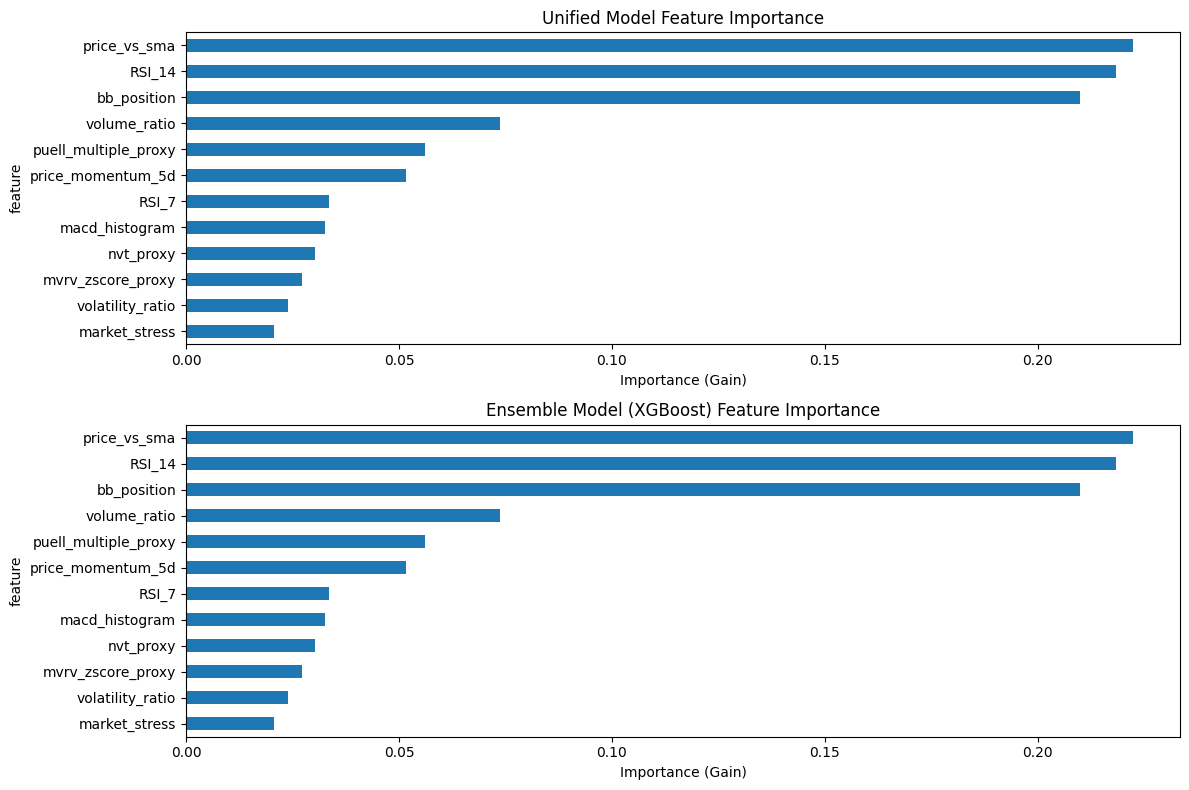


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2161
  Technical_RSI        0.1260
  Volume               0.0737
  Momentum             0.0516
  OnChain_Proxies      0.0379
  Advanced_Technical   0.0325
  Market_Stress        0.0222
WALK-FORWARD VALIDATION RESULTS for Unified_Rolling:
  • Unified Model:  71.2% accuracy (1680 predictions)
  • Ensemble Model: 72.6% accuracy (1680 predictions)

PERFORMANCE ASSESSMENT for Unified_Rolling:
EXCELLENT: 71.2% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Rolling:
  • Random Baseline:     50.0%
  • Majority Class:      63.3%
  • Your Model:          71.2%
  • Edge over Random:    +21.3%
  • Edge over Majority:  +8.0%

RESULTS ANALYSIS FOR Unified_Expanding
WALK-FORWARD CROSS-VALIDATION RESULTS
unified_model: 0.7339 ± 0.4419 (1680 predictions)
ensemble_model: 0.7256 ± 0.4462 (1680 predictions)

Regime Distribution:

Regime-Specific Performance (Average Accuracy):
 

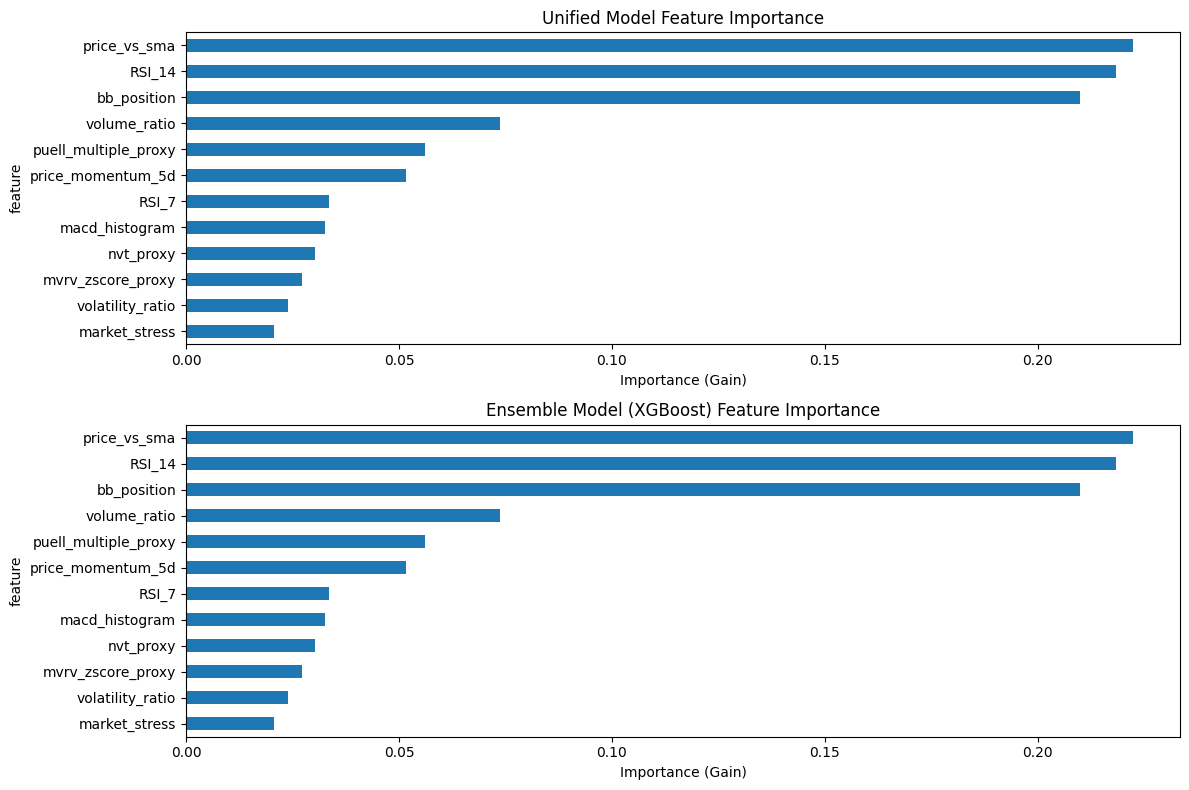


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2161
  Technical_RSI        0.1260
  Volume               0.0737
  Momentum             0.0516
  OnChain_Proxies      0.0379
  Advanced_Technical   0.0325
  Market_Stress        0.0222
WALK-FORWARD VALIDATION RESULTS for Unified_Expanding:
  • Unified Model:  73.4% accuracy (1680 predictions)
  • Ensemble Model: 72.6% accuracy (1680 predictions)

PERFORMANCE ASSESSMENT for Unified_Expanding:
EXCELLENT: 73.4% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Expanding:
  • Random Baseline:     50.0%
  • Majority Class:      63.3%
  • Your Model:          73.4%
  • Edge over Random:    +23.4%
  • Edge over Majority:  +10.1%

RESULTS ANALYSIS FOR Regime_Rolling
Total predictions made: 120
Correct predictions: 92
Regime-Specific Model Accuracy: 76.7%

Regime Model Usage:
  • Bear model used: 86 times (71.7%)
  • Bull model used: 34 times (28.3%)

Model Type Usage:
 

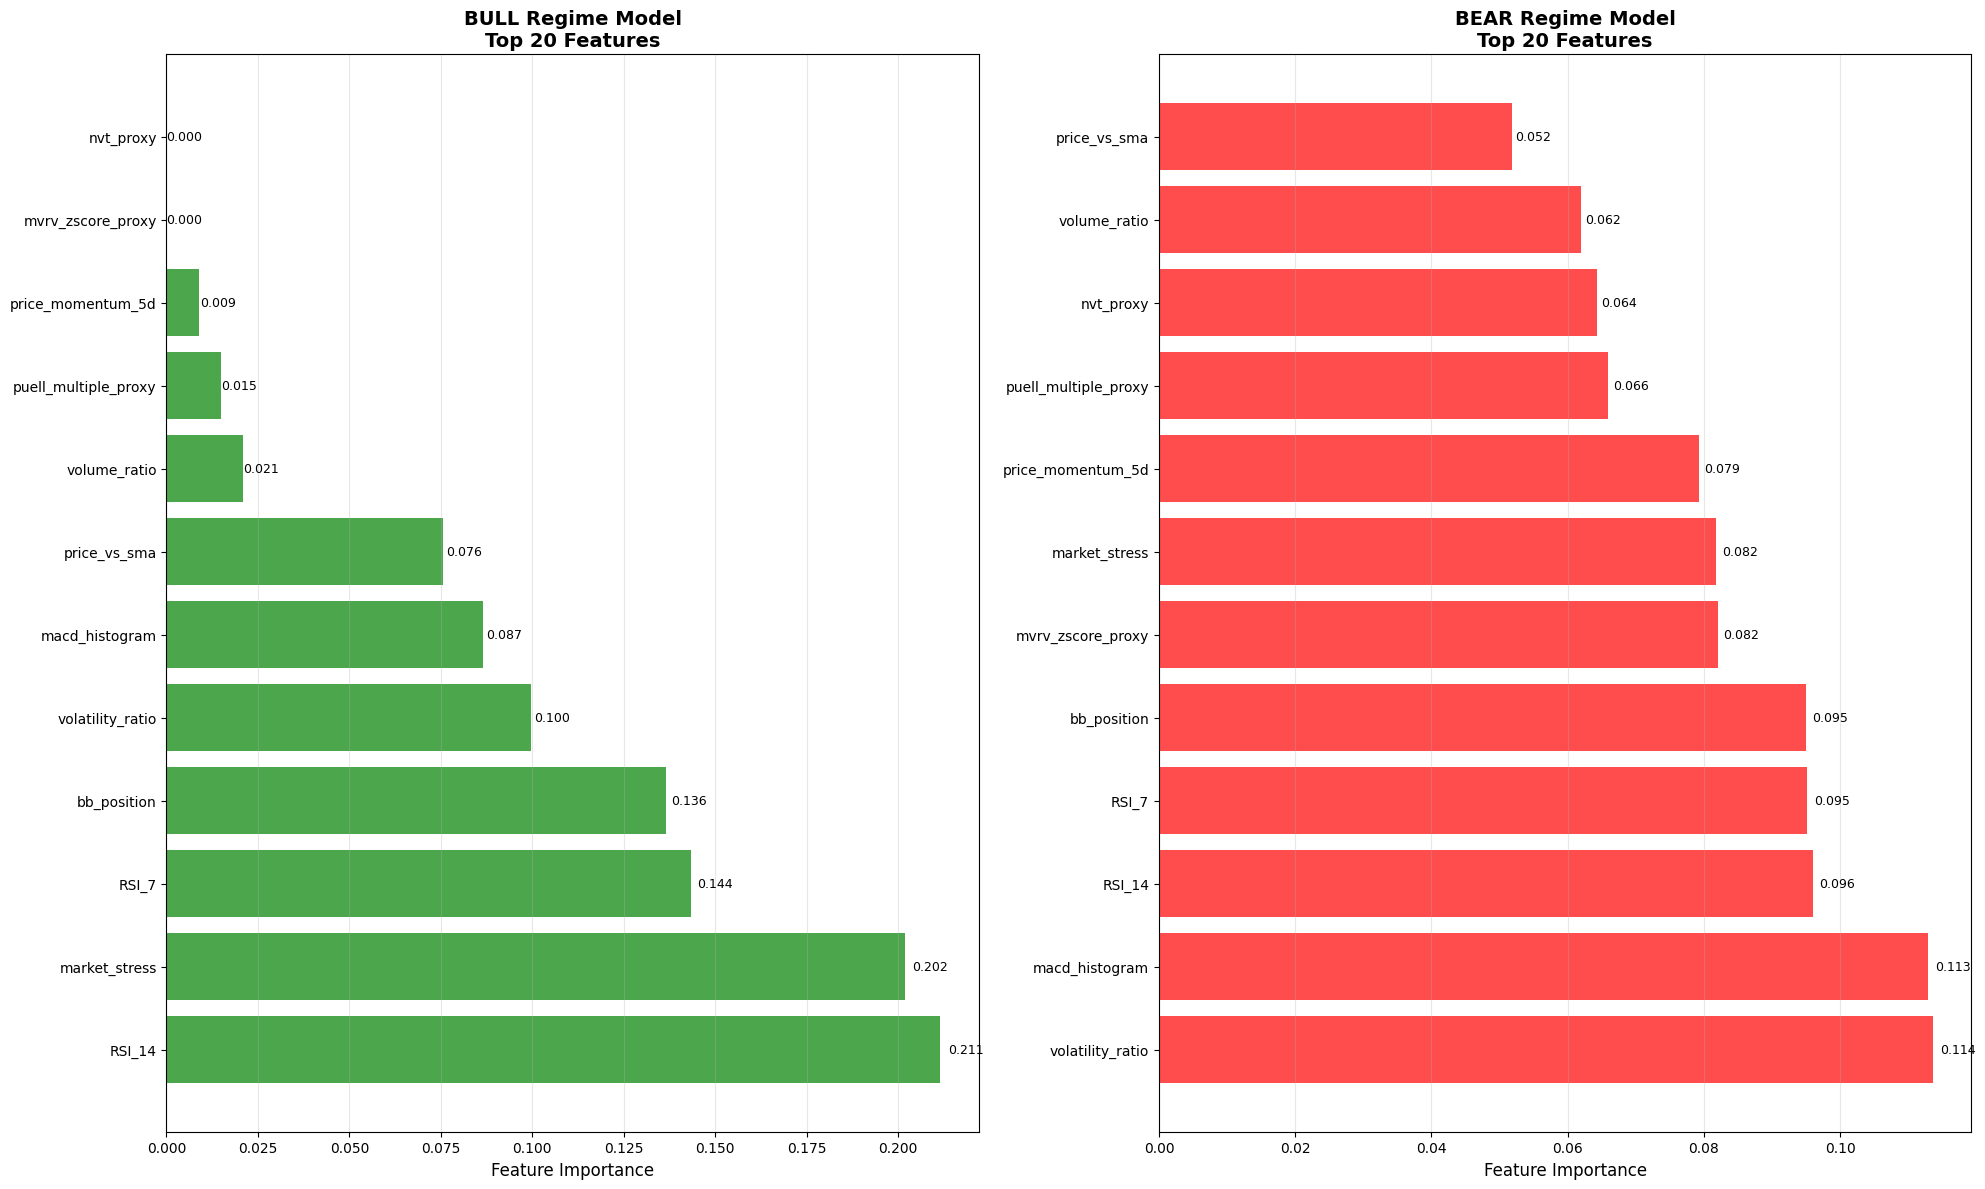

📊 Saved: regime_model_feature_comparison.png

📁 Saved: regime_model_feature_importance.csv

 ENHANCED REGIME-SPECIFIC BITCOIN PREDICTION ANALYSIS COMPLETE!


In [ ]:
from nodiensenv.analyser_bull_bear import EnhancedRegimeSpecificPredictor
from nodiensenv.constants import DATA_DIR
import pandas as pd


data_paths = {
    "bitcoin": DATA_DIR / "BTC_price_mcap.csv",
    "google_trends": DATA_DIR / "BTC_trend_log_returns_2019-2025.csv",
    "fear_greed": DATA_DIR / "fear_greed_index.csv",
}

print("Initializing ENHANCED Bitcoin Bull Market Predictor...")
predictor = EnhancedRegimeSpecificPredictor(data_paths=data_paths)

# Execute enhanced pipeline
print("Starting enhanced feature engineering...")
predictor.create_features()

# Select features first
print("Selecting robust features...")
predictor.select_robust_features()

if predictor.unified_features is None:
    print("❌ Feature selection failed!")
    exit()
else:
    print(f"✅ Selected {len(predictor.unified_features)} features")


# NEW: Train regime-specific models (bull/bear prediction models)
print("Available columns in feature_df:")
if predictor.feature_df is not None:
    print(list(predictor.feature_df.columns))
else:
    print("feature_df is None!")
print("\nSelected unified_features:")
print(predictor.unified_features)

print("Training regime-specific models...")
predictor.train_regime_specific_models()

# Keep your original unified models as well
print("Training unified models...")
predictor.train_regime_models()  # Your original method
predictor.train_ensemble_models()

# Walk-forward validation - BOTH approaches
print("\n" + "=" * 70)
print("WALK-FORWARD CROSS-VALIDATION")
print("=" * 70)

# Configuration 1: Original unified model approach
print("Testing Original Unified Models...")
print("Rolling Window (600 days)...")
wf_results_rolling = predictor.walk_forward_validation(
    window_size=600, step_size=30, min_train_size=300
)

print("Expanding Window...")
wf_results_expanding = predictor.walk_forward_validation(
    window_size=None, step_size=30, min_train_size=300
)

# Configuration 2: NEW regime-specific approach
print("\n" + "=" * 50)
print("REGIME-SPECIFIC MODEL VALIDATION")
print("=" * 50)

print("Testing Regime-Specific Models (Rolling Window)...")
regime_results_rolling = predictor.walk_forward_validation_regime_specific(
    window_size=600, step_size=30, min_train_size=300
)

print("Testing Regime-Specific Models (Expanding Window)...")
regime_results_expanding = predictor.walk_forward_validation_regime_specific(
    window_size=None, step_size=30, min_train_size=300
)

# Organize all results
all_configurations = {
    "Unified_Rolling": wf_results_rolling,
    "Unified_Expanding": wf_results_expanding,
    "Regime_Rolling": regime_results_rolling,
    "Regime_Expanding": regime_results_expanding,
}

# Analyze each configuration
for configuration, results in all_configurations.items():
    print("\n" + "=" * 70)
    print(f"RESULTS ANALYSIS FOR {configuration}")
    print("=" * 70)

    if configuration.startswith("Regime"):
        # Handle regime-specific results
        if results.get("predictions") and len(results["predictions"]) > 0:
            total_predictions = len(results["predictions"])
            correct_predictions = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            )
            accuracy = correct_predictions / total_predictions

            print(f"Total predictions made: {total_predictions}")
            print(f"Correct predictions: {correct_predictions}")
            print(f"Regime-Specific Model Accuracy: {accuracy:.1%}")

            # Regime usage analysis
            regime_usage = pd.Series(results["regimes_used"]).value_counts()
            print(f"\nRegime Model Usage:")
            for regime, count in regime_usage.items():
                percentage = count / total_predictions * 100
                print(
                    f"  • {regime.title()} model used: {count} times ({percentage:.1f}%)"
                )

            # Model usage analysis
            model_usage = pd.Series(results["models_used"]).value_counts()
            print(f"\nModel Type Usage:")
            for model, count in model_usage.items():
                percentage = count / total_predictions * 100
                print(f"  • {model}: {count} times ({percentage:.1f}%)")

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if accuracy > 0.70:
                print(
                    f"EXCELLENT: {accuracy:.1%} accuracy is exceptional for regime prediction!"
                )
            elif accuracy > 0.60:
                print(
                    f"VERY GOOD: {accuracy:.1%} accuracy is strong for regime transitions!"
                )
            elif accuracy > 0.55:
                print(
                    f"GOOD: {accuracy:.1%} accuracy shows meaningful predictive value!"
                )
            elif accuracy > 0.52:
                print(
                    f"MODERATE: {accuracy:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {accuracy:.1%} accuracy needs significant improvement")

            # Save regime-specific results
            regime_df = pd.DataFrame(
                {
                    "prediction": results["predictions"],
                    "actual": results["actual"],
                    "regime_used": results["regimes_used"],
                    "model_used": results["models_used"],
                }
            )
            regime_df.to_csv(
                f"regime_specific_results_{configuration}.csv", index=False
            )

        else:
            print("No regime-specific predictions were generated!")

    else:
        # Handle unified model results (your original code)
        if results.get("unified_model") and len(results["unified_model"]) > 0:
            # Your existing analysis code
            results_df = predictor.analyze_walk_forward_results(results)
            results_df.to_csv(
                f"enhanced_walk_forward_results_{configuration}.csv", index=False
            )

            importance_df = predictor.get_feature_importance_analysis()
            importance_df.to_csv(
                f"feature_importance_detailed_{configuration}.csv", index=False
            )

            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            ensemble_acc = sum(results["ensemble_model"]) / len(
                results["ensemble_model"]
            )

            print(f"WALK-FORWARD VALIDATION RESULTS for {configuration}:")
            print(
                f"  • Unified Model:  {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
            print(
                f"  • Ensemble Model: {ensemble_acc:.1%} accuracy ({len(results['ensemble_model'])} predictions)"
            )

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if unified_acc > 0.70:
                print(
                    f"EXCELLENT: {unified_acc:.1%} accuracy is exceptional for financial prediction!"
                )
            elif unified_acc > 0.60:
                print(
                    f"VERY GOOD: {unified_acc:.1%} accuracy is strong for Bitcoin prediction!"
                )
            elif unified_acc > 0.55:
                print(
                    f"GOOD: {unified_acc:.1%} accuracy shows meaningful predictive value!"
                )
            elif unified_acc > 0.52:
                print(
                    f"MODERATE: {unified_acc:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {unified_acc:.1%} accuracy needs significant improvement")

            # Baseline comparisons
            target_balance = predictor.feature_df["target"].mean()
            majority_baseline = max(target_balance, 1 - target_balance)

            print(f"\nBASELINE COMPARISONS for {configuration}:")
            print(f"  • Random Baseline:     50.0%")
            print(f"  • Majority Class:      {majority_baseline:.1%}")
            print(f"  • Your Model:          {unified_acc:.1%}")
            print(f"  • Edge over Random:    +{(unified_acc - 0.5)*100:.1f}%")
            print(
                f"  • Edge over Majority:  {(unified_acc - majority_baseline)*100:+.1f}%"
            )

        else:
            print("No unified model predictions were generated!")

# FINAL COMPREHENSIVE COMPARISON
print("\n" + "=" * 70)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 70)

print("\nModel Performance Summary:")
print("-" * 50)

for config_name, results in all_configurations.items():
    if config_name.startswith("Regime"):
        if results.get("predictions"):
            accuracy = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            ) / len(results["predictions"])
            print(
                f"{config_name:20s}: {accuracy:.1%} accuracy ({len(results['predictions'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")
    else:
        if results.get("unified_model"):
            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            print(
                f"{config_name:20s}: {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")


print("\n" + "=" * 70)
print("ANALYZING REGIME MODEL FEATURE IMPORTANCE")
print("=" * 70)

# Analyze feature importance for bull/bear models
regime_feature_importance = predictor.analyze_regime_model_feature_importance()


print(f"\n ENHANCED REGIME-SPECIFIC BITCOIN PREDICTION ANALYSIS COMPLETE!")

Restarted venv64 (Python 3.12.3)

Initializing ENHANCED Bitcoin Bull Market Predictor...
Starting enhanced feature engineering...
Loading data...
Fear & Greed index loaded successfully
Google Trends data loaded successfully
Calculating enhanced technical indicators with sentiment...
Creating enhanced bull market target...
Bull market next week target balance: 0.359
Enhanced feature set created: (1953, 96)
Selecting robust features...
Selected 12 features including log return sentiment: ['RSI_7', 'RSI_14', 'price_vs_sma', 'price_momentum_5d', 'bb_position', 'macd_histogram', 'mvrv_zscore_proxy', 'fear_greed_index', 'fear_greed_momentum', 'fear_contrarian', 'price_sentiment_divergence', 'search_price_momentum_corr']
✅ Selected 12 features
Available columns in feature_df:
['date', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto', 'supply', 'market_cap', 'price_log_return', 'volatility_5d', 'volatility_10d', 'volatility_30d', 'volumefrom_log_return', 'market_cap_log_return', 'volatility_5d_log_return', 'volatility_

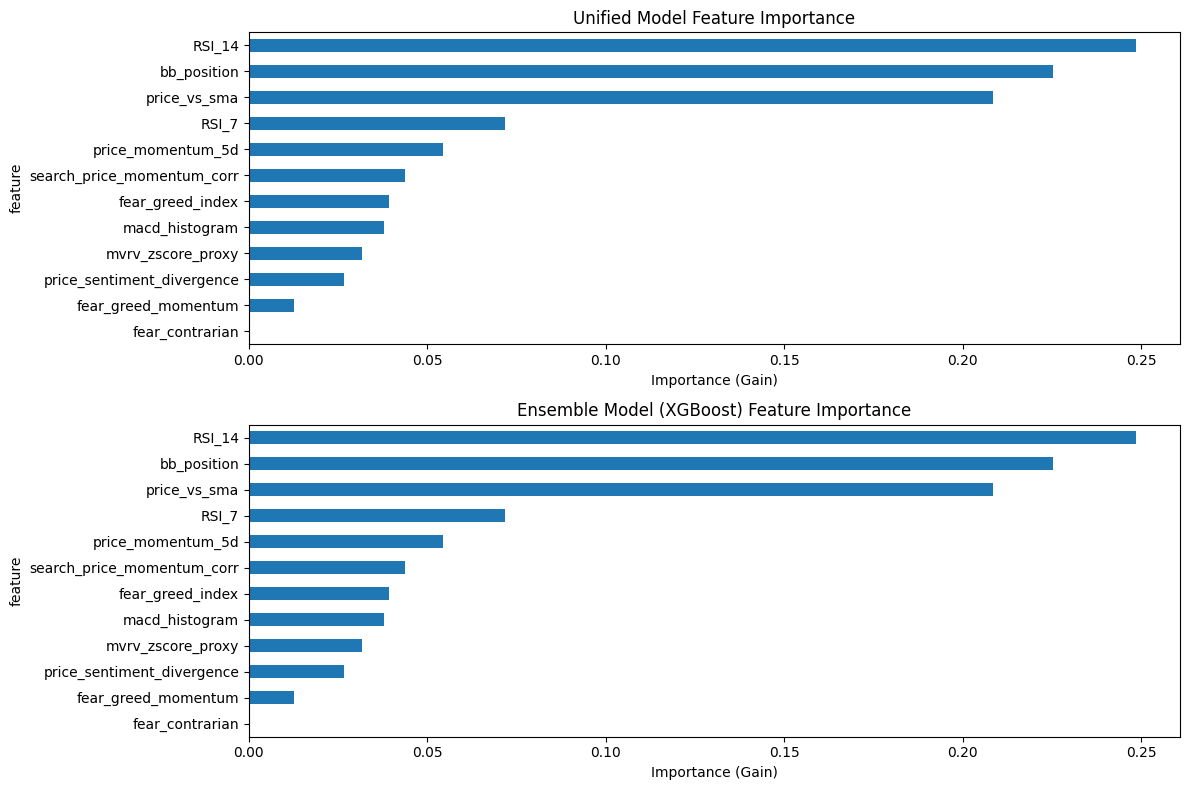


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2168
  Technical_RSI        0.1601
  Momentum             0.0544
  Sentiment_Search     0.0438
  Advanced_Technical   0.0379
  OnChain_Proxies      0.0317
  Combined_Sentiment   0.0265
  Sentiment_FearGreed  0.0173
WALK-FORWARD VALIDATION RESULTS for Unified_Rolling:
  • Unified Model:  71.0% accuracy (1650 predictions)
  • Ensemble Model: 72.7% accuracy (1650 predictions)

PERFORMANCE ASSESSMENT for Unified_Rolling:
EXCELLENT: 71.0% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Rolling:
  • Random Baseline:     50.0%
  • Majority Class:      63.8%
  • Your Model:          71.0%
  • Edge over Random:    +21.0%
  • Edge over Majority:  +7.2%

RESULTS ANALYSIS FOR Unified_Expanding
WALK-FORWARD CROSS-VALIDATION RESULTS
unified_model: 0.7345 ± 0.4416 (1650 predictions)
ensemble_model: 0.7291 ± 0.4444 (1650 predictions)

Regime Distribution:

Regime-Specific Per

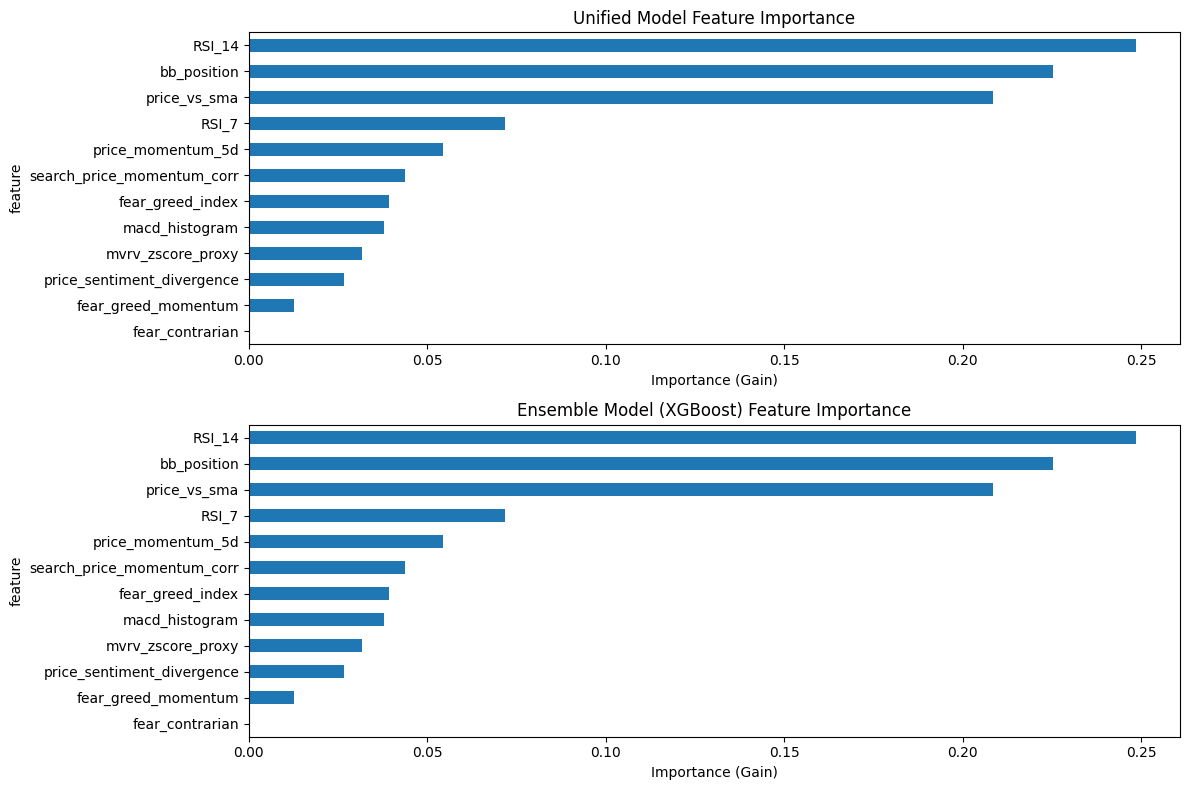


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2168
  Technical_RSI        0.1601
  Momentum             0.0544
  Sentiment_Search     0.0438
  Advanced_Technical   0.0379
  OnChain_Proxies      0.0317
  Combined_Sentiment   0.0265
  Sentiment_FearGreed  0.0173
WALK-FORWARD VALIDATION RESULTS for Unified_Expanding:
  • Unified Model:  73.5% accuracy (1650 predictions)
  • Ensemble Model: 72.9% accuracy (1650 predictions)

PERFORMANCE ASSESSMENT for Unified_Expanding:
EXCELLENT: 73.5% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Expanding:
  • Random Baseline:     50.0%
  • Majority Class:      63.8%
  • Your Model:          73.5%
  • Edge over Random:    +23.5%
  • Edge over Majority:  +9.7%

RESULTS ANALYSIS FOR Regime_Rolling
Total predictions made: 120
Correct predictions: 98
Regime-Specific Model Accuracy: 0.817
Regime-Specific Model Precision: 1.000
Regime-Specific Model Recall: 0.371
Regime-Specif

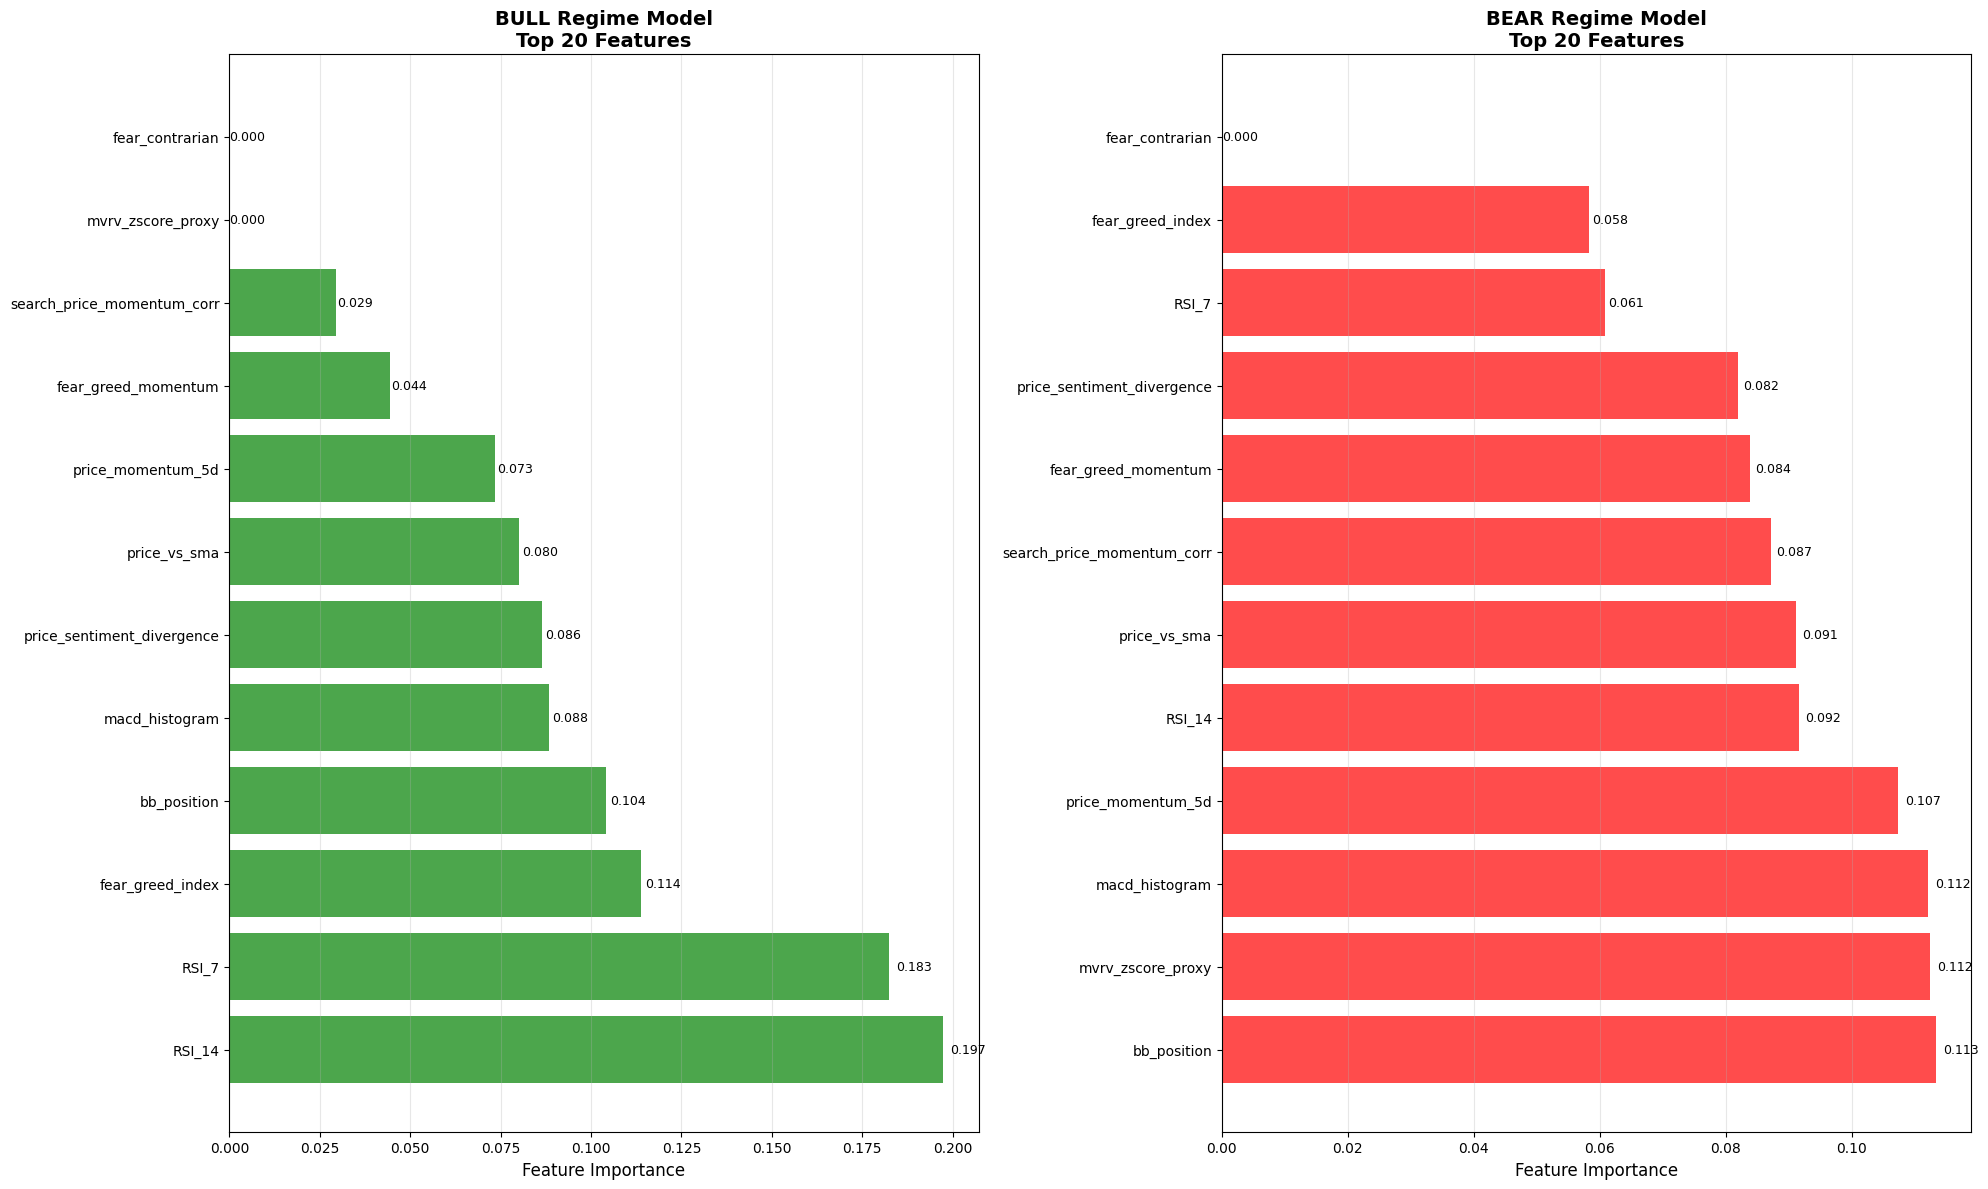

📊 Saved: regime_model_feature_comparison.png

📁 Saved: regime_model_feature_importance.csv

 ENHANCED REGIME-SPECIFIC BITCOIN PREDICTION ANALYSIS COMPLETE!


In [ ]:
from nodiensenv.analyser_bull_bear import EnhancedRegimeSpecificPredictor
from nodiensenv.constants import DATA_DIR
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


data_paths = {
    "bitcoin": DATA_DIR / "BTC_price_mcap.csv",
    "google_trends": DATA_DIR / "BTC_trend_log_returns_2019-2025.csv",
    "fear_greed": DATA_DIR / "fear_greed_index.csv",
}

print("Initializing ENHANCED Bitcoin Bull Market Predictor...")
predictor = EnhancedRegimeSpecificPredictor(data_paths=data_paths)

# Execute enhanced pipeline
print("Starting enhanced feature engineering...")
predictor.create_features()

# Select features first
print("Selecting robust features...")
predictor.select_robust_features()

if predictor.unified_features is None:
    print("❌ Feature selection failed!")
    exit()
else:
    print(f"✅ Selected {len(predictor.unified_features)} features")


# NEW: Train regime-specific models (bull/bear prediction models)
print("Available columns in feature_df:")
if predictor.feature_df is not None:
    print(list(predictor.feature_df.columns))
else:
    print("feature_df is None!")
print("\nSelected unified_features:")
print(predictor.unified_features)

print("Training regime-specific models...")
predictor.train_regime_specific_models()

# Keep your original unified models as well
print("Training unified models...")
predictor.train_regime_models()  # Your original method
predictor.train_ensemble_models()

# Walk-forward validation - BOTH approaches
print("\n" + "=" * 70)
print("WALK-FORWARD CROSS-VALIDATION")
print("=" * 70)

# Configuration 1: Original unified model approach
print("Testing Original Unified Models...")
print("Rolling Window (600 days)...")
wf_results_rolling = predictor.walk_forward_validation(
    window_size=600, step_size=30, min_train_size=300
)

print("Expanding Window...")
wf_results_expanding = predictor.walk_forward_validation(
    window_size=None, step_size=30, min_train_size=300
)

# Configuration 2: NEW regime-specific approach
print("\n" + "=" * 50)
print("REGIME-SPECIFIC MODEL VALIDATION")
print("=" * 50)

print("Testing Regime-Specific Models (Rolling Window)...")
regime_results_rolling = predictor.walk_forward_validation_regime_specific(
    window_size=600, step_size=30, min_train_size=300
)

print("Testing Regime-Specific Models (Expanding Window)...")
regime_results_expanding = predictor.walk_forward_validation_regime_specific(
    window_size=None, step_size=30, min_train_size=300
)

# Organize all results
all_configurations = {
    "Unified_Rolling": wf_results_rolling,
    "Unified_Expanding": wf_results_expanding,
    "Regime_Rolling": regime_results_rolling,
    "Regime_Expanding": regime_results_expanding,
}

# Analyze each configuration
for configuration, results in all_configurations.items():
    print("\n" + "=" * 70)
    print(f"RESULTS ANALYSIS FOR {configuration}")
    print("=" * 70)

    if configuration.startswith("Regime"):
        # Handle regime-specific results
        if results.get("predictions") and len(results["predictions"]) > 0:
            total_predictions = len(results["predictions"])
            correct_predictions = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            )
            accuracy = correct_predictions / total_predictions
            y_true = [1 if a == "bull" else 0 for a in results["actual"]]
            y_pred = [1 if p == "bull" else 0 for p in results["predictions"]]
            precision = precision_score(y_true, y_pred)
            recall = recall_score(y_true, y_pred)
            f1 = f1_score(y_true, y_pred)
            print(f"Total predictions made: {total_predictions}")
            print(f"Correct predictions: {correct_predictions}")
            print(f"Regime-Specific Model Accuracy: {accuracy:.3f}")
            print(f"Regime-Specific Model Precision: {precision:.3f}")
            print(f"Regime-Specific Model Recall: {recall:.3f}")
            print(f"Regime-Specific Model F1 Score: {f1:.3f}")

            # Regime usage analysis
            regime_usage = pd.Series(results["regimes_used"]).value_counts()
            print(f"\nRegime Model Usage:")
            for regime, count in regime_usage.items():
                percentage = count / total_predictions * 100
                print(
                    f"  • {regime.title()} model used: {count} times ({percentage:.1f}%)"
                )

            # Model usage analysis
            model_usage = pd.Series(results["models_used"]).value_counts()
            print(f"\nModel Type Usage:")
            for model, count in model_usage.items():
                percentage = count / total_predictions * 100
                print(f"  • {model}: {count} times ({percentage:.1f}%)")

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if accuracy > 0.70:
                print(
                    f"EXCELLENT: {accuracy:.1%} accuracy is exceptional for regime prediction!"
                )
            elif accuracy > 0.60:
                print(
                    f"VERY GOOD: {accuracy:.1%} accuracy is strong for regime transitions!"
                )
            elif accuracy > 0.55:
                print(
                    f"GOOD: {accuracy:.1%} accuracy shows meaningful predictive value!"
                )
            elif accuracy > 0.52:
                print(
                    f"MODERATE: {accuracy:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {accuracy:.1%} accuracy needs significant improvement")

            # Save regime-specific results
            regime_df = pd.DataFrame(
                {
                    "prediction": results["predictions"],
                    "actual": results["actual"],
                    "regime_used": results["regimes_used"],
                    "model_used": results["models_used"],
                }
            )
            regime_df.to_csv(
                f"regime_specific_results_{configuration}.csv", index=False
            )

        else:
            print("No regime-specific predictions were generated!")

    else:
        # Handle unified model results (your original code)
        if results.get("unified_model") and len(results["unified_model"]) > 0:
            # Your existing analysis code
            results_df = predictor.analyze_walk_forward_results(results)
            results_df.to_csv(
                f"enhanced_walk_forward_results_{configuration}.csv", index=False
            )

            importance_df = predictor.get_feature_importance_analysis()
            importance_df.to_csv(
                f"feature_importance_detailed_{configuration}.csv", index=False
            )

            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            ensemble_acc = sum(results["ensemble_model"]) / len(
                results["ensemble_model"]
            )

            print(f"WALK-FORWARD VALIDATION RESULTS for {configuration}:")
            print(
                f"  • Unified Model:  {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
            print(
                f"  • Ensemble Model: {ensemble_acc:.1%} accuracy ({len(results['ensemble_model'])} predictions)"
            )

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if unified_acc > 0.70:
                print(
                    f"EXCELLENT: {unified_acc:.1%} accuracy is exceptional for financial prediction!"
                )
            elif unified_acc > 0.60:
                print(
                    f"VERY GOOD: {unified_acc:.1%} accuracy is strong for Bitcoin prediction!"
                )
            elif unified_acc > 0.55:
                print(
                    f"GOOD: {unified_acc:.1%} accuracy shows meaningful predictive value!"
                )
            elif unified_acc > 0.52:
                print(
                    f"MODERATE: {unified_acc:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {unified_acc:.1%} accuracy needs significant improvement")

            # Baseline comparisons
            target_balance = predictor.feature_df["target"].mean()
            majority_baseline = max(target_balance, 1 - target_balance)

            print(f"\nBASELINE COMPARISONS for {configuration}:")
            print(f"  • Random Baseline:     50.0%")
            print(f"  • Majority Class:      {majority_baseline:.1%}")
            print(f"  • Your Model:          {unified_acc:.1%}")
            print(f"  • Edge over Random:    +{(unified_acc - 0.5)*100:.1f}%")
            print(
                f"  • Edge over Majority:  {(unified_acc - majority_baseline)*100:+.1f}%"
            )

        else:
            print("No unified model predictions were generated!")

# FINAL COMPREHENSIVE COMPARISON
print("\n" + "=" * 70)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 70)

print("\nModel Performance Summary:")
print("-" * 50)

for config_name, results in all_configurations.items():
    if config_name.startswith("Regime"):
        if results.get("predictions"):
            accuracy = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            ) / len(results["predictions"])
            print(
                f"{config_name:20s}: {accuracy:.1%} accuracy ({len(results['predictions'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")
    else:
        if results.get("unified_model"):
            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            print(
                f"{config_name:20s}: {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")


print("\n" + "=" * 70)
print("ANALYZING REGIME MODEL FEATURE IMPORTANCE")
print("=" * 70)

# Analyze feature importance for bull/bear models
regime_feature_importance = predictor.analyze_regime_model_feature_importance()


print(f"\n ENHANCED REGIME-SPECIFIC BITCOIN PREDICTION ANALYSIS COMPLETE!")

Initializing ENHANCED Bitcoin Bull Market Predictor...
Starting enhanced feature engineering...
Loading data...
Fear & Greed index loaded successfully
Google Trends data loaded successfully
Calculating enhanced technical indicators with sentiment...
Creating enhanced bull market target...
Bull market next week target balance: 0.325
Enhanced feature set created: (2318, 96)
Selecting robust features...
Selected 12 features including log return sentiment: ['RSI_7', 'RSI_14', 'price_vs_sma', 'price_momentum_5d', 'bb_position', 'macd_histogram', 'mvrv_zscore_proxy', 'fear_greed_index', 'fear_greed_momentum', 'fear_contrarian', 'price_sentiment_divergence', 'search_price_momentum_corr']
✅ Selected 12 features
Available columns in feature_df:
['date', 'open', 'high', 'low', 'close', 'volumefrom', 'volumeto', 'supply', 'market_cap', 'price_log_return', 'volumefrom_log_return', 'market_cap_log_return', 'volatility_5d', 'volatility_10d', 'volatility_30d', 'volatility_5d_log_return', 'volatility_

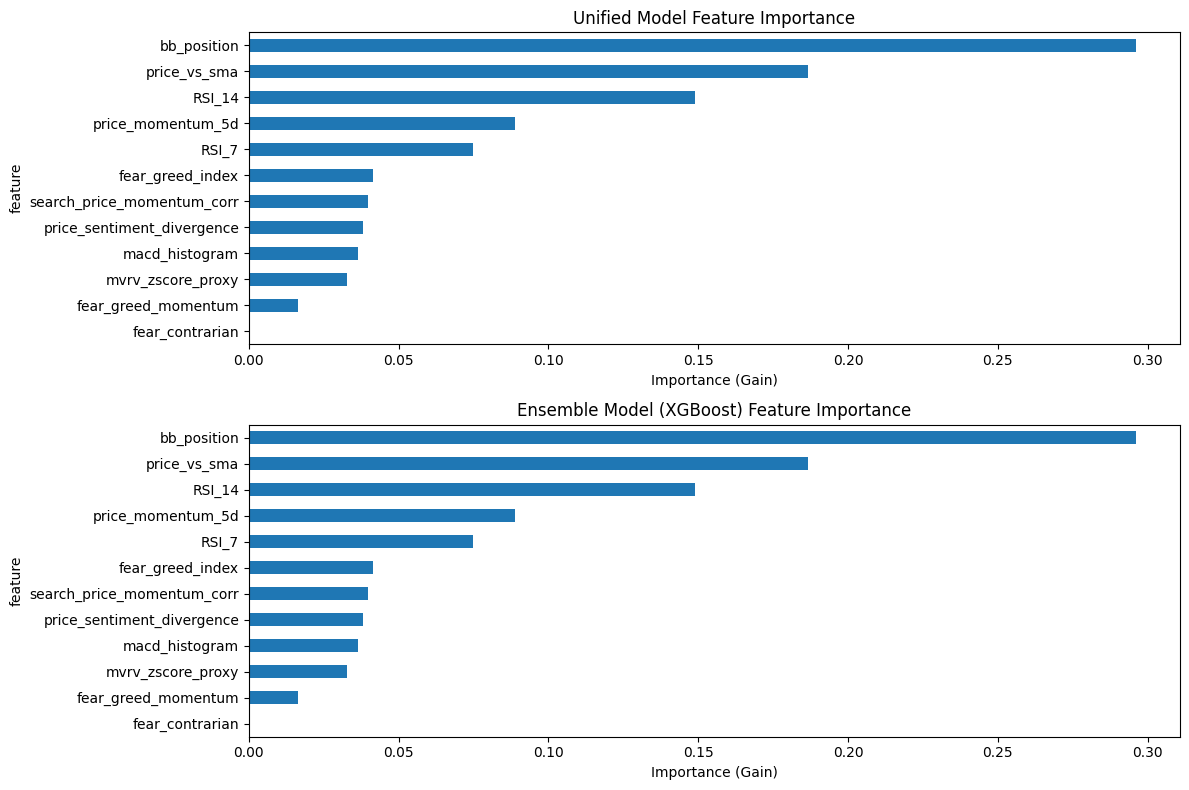


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2413
  Technical_RSI        0.1119
  Momentum             0.0889
  Sentiment_Search     0.0399
  Combined_Sentiment   0.0379
  Advanced_Technical   0.0364
  OnChain_Proxies      0.0327
  Sentiment_FearGreed  0.0193
WALK-FORWARD VALIDATION RESULTS for Unified_Rolling:
  • Unified Model:  71.5% accuracy (2010 predictions)
  • Ensemble Model: 73.1% accuracy (2010 predictions)

PERFORMANCE ASSESSMENT for Unified_Rolling:
EXCELLENT: 71.5% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Rolling:
  • Random Baseline:     50.0%
  • Majority Class:      64.5%
  • Your Model:          71.5%
  • Edge over Random:    +21.5%
  • Edge over Majority:  +7.0%

RESULTS ANALYSIS FOR Unified_Expanding
WALK-FORWARD CROSS-VALIDATION RESULTS
unified_model: 0.7343 ± 0.4417 (2010 predictions)
ensemble_model: 0.7333 ± 0.4422 (2010 predictions)

Regime Distribution:

Regime-Specific Per

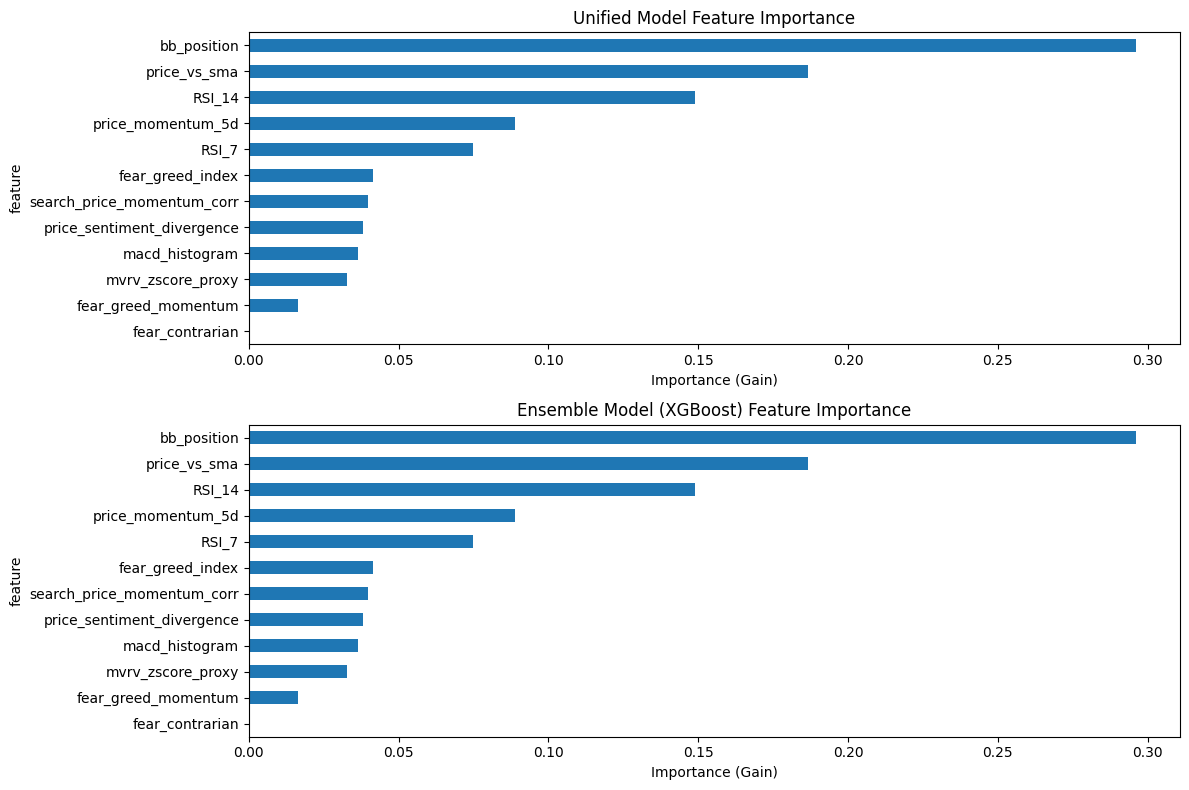


Feature Category Analysis:
Feature Category Importance (Average):
  Price_Position       0.2413
  Technical_RSI        0.1119
  Momentum             0.0889
  Sentiment_Search     0.0399
  Combined_Sentiment   0.0379
  Advanced_Technical   0.0364
  OnChain_Proxies      0.0327
  Sentiment_FearGreed  0.0193
WALK-FORWARD VALIDATION RESULTS for Unified_Expanding:
  • Unified Model:  73.4% accuracy (2010 predictions)
  • Ensemble Model: 73.3% accuracy (2010 predictions)

PERFORMANCE ASSESSMENT for Unified_Expanding:
EXCELLENT: 73.4% accuracy is exceptional for financial prediction!

BASELINE COMPARISONS for Unified_Expanding:
  • Random Baseline:     50.0%
  • Majority Class:      64.5%
  • Your Model:          73.4%
  • Edge over Random:    +23.4%
  • Edge over Majority:  +8.9%

RESULTS ANALYSIS FOR Regime_Rolling
Total predictions made: 180
Correct predictions: 151
Regime-Specific Model Accuracy: 0.839
Regime-Specific Model Precision: 0.762
Regime-Specific Model Recall: 0.400
Regime-Speci

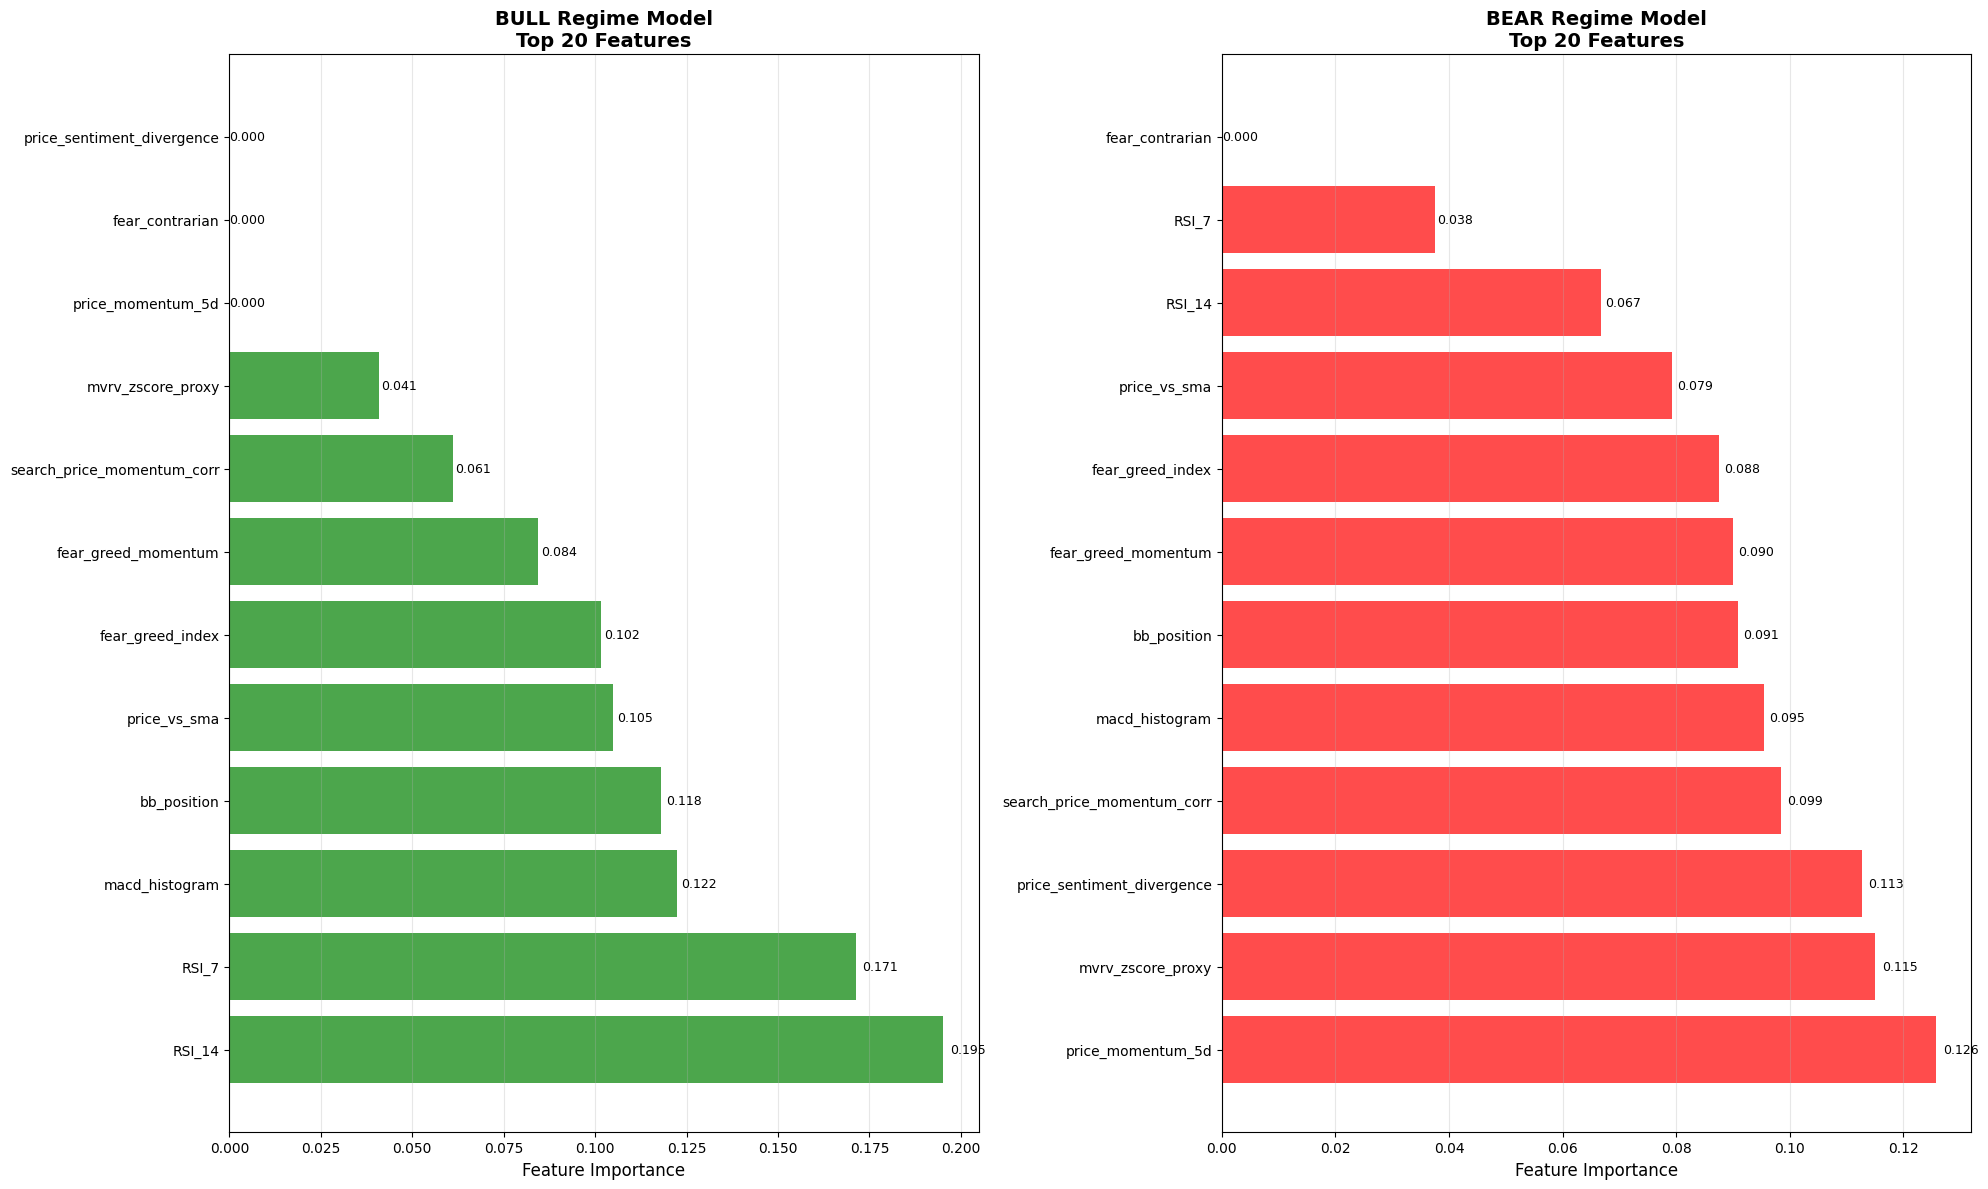

📊 Saved: regime_model_feature_comparison.png

📁 Saved: regime_model_feature_importance.csv

 ENHANCED REGIME-SPECIFIC BITCOIN PREDICTION ANALYSIS COMPLETE!


In [ ]:
from nodiensenv.analyser_bull_bear import EnhancedRegimeSpecificPredictor
from nodiensenv.constants import DATA_DIR
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


data_paths = {
    "bitcoin": DATA_DIR / "BTC_price_mcap.csv",
    "google_trends": DATA_DIR / "BTC_trend_log_returns_2018-2025.csv",
    "fear_greed": DATA_DIR / "fear_greed_index.csv",
}

print("Initializing ENHANCED Bitcoin Bull Market Predictor...")
predictor = EnhancedRegimeSpecificPredictor(data_paths=data_paths)

# Execute enhanced pipeline
print("Starting enhanced feature engineering...")
predictor.create_features()

# Select features first
print("Selecting robust features...")
predictor.select_robust_features()

if predictor.unified_features is None:
    print("❌ Feature selection failed!")
    exit()
else:
    print(f"✅ Selected {len(predictor.unified_features)} features")


# NEW: Train regime-specific models (bull/bear prediction models)
print("Available columns in feature_df:")
if predictor.feature_df is not None:
    print(list(predictor.feature_df.columns))
else:
    print("feature_df is None!")
print("\nSelected unified_features:")
print(predictor.unified_features)

print("Training regime-specific models...")
predictor.train_regime_specific_models()

# Keep your original unified models as well
print("Training unified models...")
predictor.train_regime_models()  # Your original method
predictor.train_ensemble_models()

# Walk-forward validation - BOTH approaches
print("\n" + "=" * 70)
print("WALK-FORWARD CROSS-VALIDATION")
print("=" * 70)

# Configuration 1: Original unified model approach
print("Testing Original Unified Models...")
print("Rolling Window (600 days)...")
wf_results_rolling = predictor.walk_forward_validation(
    window_size=600, step_size=30, min_train_size=300
)

print("Expanding Window...")
wf_results_expanding = predictor.walk_forward_validation(
    window_size=None, step_size=30, min_train_size=300
)

# Configuration 2: NEW regime-specific approach
print("\n" + "=" * 50)
print("REGIME-SPECIFIC MODEL VALIDATION")
print("=" * 50)

print("Testing Regime-Specific Models (Rolling Window)...")
regime_results_rolling = predictor.walk_forward_validation_regime_specific(
    window_size=600, step_size=30, min_train_size=300
)

print("Testing Regime-Specific Models (Expanding Window)...")
regime_results_expanding = predictor.walk_forward_validation_regime_specific(
    window_size=None, step_size=30, min_train_size=300
)

# Organize all results
all_configurations = {
    "Unified_Rolling": wf_results_rolling,
    "Unified_Expanding": wf_results_expanding,
    "Regime_Rolling": regime_results_rolling,
    "Regime_Expanding": regime_results_expanding,
}

# Analyze each configuration
for configuration, results in all_configurations.items():
    print("\n" + "=" * 70)
    print(f"RESULTS ANALYSIS FOR {configuration}")
    print("=" * 70)

    if configuration.startswith("Regime"):
        # Handle regime-specific results
        if results.get("predictions") and len(results["predictions"]) > 0:
            total_predictions = len(results["predictions"])
            correct_predictions = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            )
            accuracy = correct_predictions / total_predictions
            y_true = [1 if a == "bull" else 0 for a in results["actual"]]
            y_pred = [1 if p == "bull" else 0 for p in results["predictions"]]
            precision = precision_score(y_true, y_pred)
            recall = recall_score(y_true, y_pred)
            f1 = f1_score(y_true, y_pred)
            print(f"Total predictions made: {total_predictions}")
            print(f"Correct predictions: {correct_predictions}")
            print(f"Regime-Specific Model Accuracy: {accuracy:.3f}")
            print(f"Regime-Specific Model Precision: {precision:.3f}")
            print(f"Regime-Specific Model Recall: {recall:.3f}")
            print(f"Regime-Specific Model F1 Score: {f1:.3f}")

            # Regime usage analysis
            regime_usage = pd.Series(results["regimes_used"]).value_counts()
            print(f"\nRegime Model Usage:")
            for regime, count in regime_usage.items():
                percentage = count / total_predictions * 100
                print(
                    f"  • {regime.title()} model used: {count} times ({percentage:.1f}%)"
                )

            # Model usage analysis
            model_usage = pd.Series(results["models_used"]).value_counts()
            print(f"\nModel Type Usage:")
            for model, count in model_usage.items():
                percentage = count / total_predictions * 100
                print(f"  • {model}: {count} times ({percentage:.1f}%)")

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if accuracy > 0.70:
                print(
                    f"EXCELLENT: {accuracy:.1%} accuracy is exceptional for regime prediction!"
                )
            elif accuracy > 0.60:
                print(
                    f"VERY GOOD: {accuracy:.1%} accuracy is strong for regime transitions!"
                )
            elif accuracy > 0.55:
                print(
                    f"GOOD: {accuracy:.1%} accuracy shows meaningful predictive value!"
                )
            elif accuracy > 0.52:
                print(
                    f"MODERATE: {accuracy:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {accuracy:.1%} accuracy needs significant improvement")

            # Save regime-specific results
            regime_df = pd.DataFrame(
                {
                    "prediction": results["predictions"],
                    "actual": results["actual"],
                    "regime_used": results["regimes_used"],
                    "model_used": results["models_used"],
                }
            )
            regime_df.to_csv(
                f"regime_specific_results_{configuration}.csv", index=False
            )

        else:
            print("No regime-specific predictions were generated!")

    else:
        # Handle unified model results (your original code)
        if results.get("unified_model") and len(results["unified_model"]) > 0:
            # Your existing analysis code
            results_df = predictor.analyze_walk_forward_results(results)
            results_df.to_csv(
                f"enhanced_walk_forward_results_{configuration}.csv", index=False
            )

            importance_df = predictor.get_feature_importance_analysis()
            importance_df.to_csv(
                f"feature_importance_detailed_{configuration}.csv", index=False
            )

            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            ensemble_acc = sum(results["ensemble_model"]) / len(
                results["ensemble_model"]
            )

            print(f"WALK-FORWARD VALIDATION RESULTS for {configuration}:")
            print(
                f"  • Unified Model:  {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
            print(
                f"  • Ensemble Model: {ensemble_acc:.1%} accuracy ({len(results['ensemble_model'])} predictions)"
            )

            # Performance assessment
            print(f"\nPERFORMANCE ASSESSMENT for {configuration}:")
            if unified_acc > 0.70:
                print(
                    f"EXCELLENT: {unified_acc:.1%} accuracy is exceptional for financial prediction!"
                )
            elif unified_acc > 0.60:
                print(
                    f"VERY GOOD: {unified_acc:.1%} accuracy is strong for Bitcoin prediction!"
                )
            elif unified_acc > 0.55:
                print(
                    f"GOOD: {unified_acc:.1%} accuracy shows meaningful predictive value!"
                )
            elif unified_acc > 0.52:
                print(
                    f"MODERATE: {unified_acc:.1%} accuracy is above random but could be improved"
                )
            else:
                print(f"POOR: {unified_acc:.1%} accuracy needs significant improvement")

            # Baseline comparisons
            target_balance = predictor.feature_df["target"].mean()
            majority_baseline = max(target_balance, 1 - target_balance)

            print(f"\nBASELINE COMPARISONS for {configuration}:")
            print(f"  • Random Baseline:     50.0%")
            print(f"  • Majority Class:      {majority_baseline:.1%}")
            print(f"  • Your Model:          {unified_acc:.1%}")
            print(f"  • Edge over Random:    +{(unified_acc - 0.5)*100:.1f}%")
            print(
                f"  • Edge over Majority:  {(unified_acc - majority_baseline)*100:+.1f}%"
            )

        else:
            print("No unified model predictions were generated!")

# FINAL COMPREHENSIVE COMPARISON
print("\n" + "=" * 70)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 70)

print("\nModel Performance Summary:")
print("-" * 50)

for config_name, results in all_configurations.items():
    if config_name.startswith("Regime"):
        if results.get("predictions"):
            accuracy = sum(
                1 for p, a in zip(results["predictions"], results["actual"]) if p == a
            ) / len(results["predictions"])
            print(
                f"{config_name:20s}: {accuracy:.1%} accuracy ({len(results['predictions'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")
    else:
        if results.get("unified_model"):
            unified_acc = sum(results["unified_model"]) / len(results["unified_model"])
            print(
                f"{config_name:20s}: {unified_acc:.1%} accuracy ({len(results['unified_model'])} predictions)"
            )
        else:
            print(f"{config_name:20s}: No predictions generated")


print("\n" + "=" * 70)
print("ANALYZING REGIME MODEL FEATURE IMPORTANCE")
print("=" * 70)

# Analyze feature importance for bull/bear models
regime_feature_importance = predictor.analyze_regime_model_feature_importance()


print(f"\n ENHANCED REGIME-SPECIFIC BITCOIN PREDICTION ANALYSIS COMPLETE!")

Connected to venv64 (Python 3.12.3)

No kernel connected

No kernel connected

No kernel connected

No kernel connected

No kernel connected

No kernel connected

Connected to venv64 (Python 3.12.3)